# Index Tracking and Forward Testing (US Stocks)

## Importing the Data

In [1]:
import pandas as pd

In [2]:
const = pd.read_csv("const_prices.csv", parse_dates = ["Date"], index_col = "Date")
const

AAPL        AXP          BA         CAT       CSCO  \
Date                                                                   
2007-01-03   11.971429  60.360001   89.169998   61.160000  27.730000   
2007-01-04   12.237143  59.919998   89.529999   61.000000  28.459999   
2007-01-05   12.150000  59.130001   89.150002   60.220001  28.469999   
2007-01-08   12.210000  59.689999   88.940002   60.290001  28.629999   
2007-01-09   13.224286  59.310001   88.000000   60.619999  28.469999   
...                ...        ...         ...         ...        ...   
2020-03-24  246.880005  84.050003  127.680000  101.339996  38.599998   
2020-03-25  245.520004  90.169998  158.729996  104.669998  37.669998   
2020-03-26  258.440002  93.290001  180.550003  110.500000  40.580002   
2020-03-27  247.740005  88.730003  162.000000  105.440002  38.820000   
2020-03-30  254.809998  90.269997  152.279999  111.709999  40.320000   

                  CVX         DIS        DOW          GS          HD  ...  \
Date                                                                  ...   
2007-01-03  70.970001   33.738300        NaN  200.720001   41.070000  ...   
2007-01-04  70.279999   34.004654        NaN  198.850006   40.570000  ...   
2007-01-05  70.550003   33.728436        NaN  199.050003   39.790001  ...   
2007-01-08  71.449997   34.034248        NaN  203.729996   39.490002  ...   
2007-01-09  70.629997   33.984924        NaN  204.080002   39.320000  ...   
...               ...         ...        ...         ...         ...  ...   
2020-03-24  66.550003   98.120003  28.469999  153.600006  184.720001  ...   
2020-03-25  69.269997  100.730003  30.379999  155.130005  181.759995  ...   
2020-03-26  76.379997  105.360001  29.680000  165.789993  195.210007  ...   
2020-03-27  68.779999   96.400002  28.559999  158.339996  190.550003  ...   
2020-03-30  71.949997   99.800003  28.650000  159.619995  196.100006  ...   

                  PFE          PG        RTX         TRV         UNH  \
Date                                                                   
2007-01-03  26.290001   64.540001  39.528004   53.549999   52.570000   
2007-01-04  26.379999   64.050003  39.565765   53.099998   52.910000   
2007-01-05  26.299999   63.500000  39.446194   52.410000   52.549999   
2007-01-08  26.160000   63.639999  39.767151   52.020000   53.320000   
2007-01-09  26.170000   63.480000  39.314034   51.889999   52.680000   
...               ...         ...        ...         ...         ...   
2020-03-24  29.700001  103.269997  54.600376   93.739998  219.800003   
2020-03-25  29.750000  100.919998  60.534927   92.180000  234.490005   
2020-03-26  31.750000  107.379997  65.852737   98.669998  255.389999   
2020-03-27  30.900000  110.169998  61.139080   99.949997  242.449997   
2020-03-30  32.669998  115.000000  61.982380  102.589996  251.279999   

                     V         VZ        WBA         WMT        XOM  
Date                                                                 
2007-01-03         NaN  35.306732  46.070000   47.549999  74.110001  
2007-01-04         NaN  35.502777  46.160000   47.779999  72.720001  
2007-01-05         NaN  34.895969  45.500000   47.389999  73.239998  
2007-01-08         NaN  34.363850  45.689999   47.000000  72.650002  
2007-01-09         NaN  34.503880  45.930000   47.389999  72.089996  
...                ...        ...        ...         ...        ...  
2020-03-24  154.529999  49.990002  45.250000  115.029999  35.439999  
2020-03-25  161.779999  49.939999  41.439999  109.400002  37.290001  
2020-03-26  168.880005  53.540001  45.669998  109.820000  38.820000  
2020-03-27  161.559998  52.770000  44.000000  109.580002  36.950001  
2020-03-30  165.570007  54.770000  45.160000  115.190002  37.500000  

[3334 rows x 30 columns]

In [3]:
const.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3334 entries, 2007-01-03 to 2020-03-30
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3333 non-null   float64
 1   AXP     3333 non-null   float64
 2   BA      3333 non-null   float64
 3   CAT     3333 non-null   float64
 4   CSCO    3333 non-null   float64
 5   CVX     3333 non-null   float64
 6   DIS     3333 non-null   float64
 7   DOW     260 non-null    float64
 8   GS      3333 non-null   float64
 9   HD      3333 non-null   float64
 10  IBM     3333 non-null   float64
 11  INTC    3333 non-null   float64
 12  JNJ     3333 non-null   float64
 13  JPM     3333 non-null   float64
 14  KO      3333 non-null   float64
 15  MCD     3333 non-null   float64
 16  MMM     3333 non-null   float64
 17  MRK     3333 non-null   float64
 18  MSFT    3333 non-null   float64
 19  NKE     3333 non-null   float64
 20  PFE     3333 non-null   float64
 21  PG      3333 non-nu

In [4]:
dji = pd.read_csv("dji.csv", parse_dates = ["Date"], index_col = "Date")
dji

Open          High           Low         Close  \
Date                                                                 
2007-01-03  12459.540039  12580.349609  12404.820312  12474.519531   
2007-01-04  12473.160156  12510.410156  12403.860352  12480.690430   
2007-01-05  12480.049805  12480.129883  12365.410156  12398.009766   
2007-01-08  12392.009766  12445.919922  12337.370117  12423.490234   
2007-01-09  12424.769531  12466.429688  12369.169922  12416.599609   
...                  ...           ...           ...           ...   
2020-03-24  19722.189453  20737.699219  19649.250000  20704.910156   
2020-03-25  21050.339844  22019.929688  20538.339844  21200.550781   
2020-03-26  21468.380859  22595.060547  21427.099609  22552.169922   
2020-03-27  21898.470703  22327.570312  21469.269531  21636.779297   
2020-03-30  21678.220703  22378.089844  21522.080078  22327.480469   

               Adj Close     Volume  
Date                                 
2007-01-03  12474.519531  327200000  
2007-01-04  12480.690430  259060000  
2007-01-05  12398.009766  235220000  
2007-01-08  12423.490234  223500000  
2007-01-09  12416.599609  225190000  
...                  ...        ...  
2020-03-24  20704.910156  799340000  
2020-03-25  21200.550781  796320000  
2020-03-26  22552.169922  705180000  
2020-03-27  21636.779297  588830000  
2020-03-30  22327.480469  545540000  

[3333 rows x 6 columns]

In [5]:
dji.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3333 entries, 2007-01-03 to 2020-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3333 non-null   float64
 1   High       3333 non-null   float64
 2   Low        3333 non-null   float64
 3   Close      3333 non-null   float64
 4   Adj Close  3333 non-null   float64
 5   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 182.3 KB


In [6]:
dji = dji.Close.to_frame().copy()

In [7]:
dji

Close
Date                    
2007-01-03  12474.519531
2007-01-04  12480.690430
2007-01-05  12398.009766
2007-01-08  12423.490234
2007-01-09  12416.599609
...                  ...
2020-03-24  20704.910156
2020-03-25  21200.550781
2020-03-26  22552.169922
2020-03-27  21636.779297
2020-03-30  22327.480469

[3333 rows x 1 columns]

In [8]:
df = pd.concat([const, dji], axis = 1)
df

AAPL        AXP          BA         CAT       CSCO  \
Date                                                                   
2007-01-03   11.971429  60.360001   89.169998   61.160000  27.730000   
2007-01-04   12.237143  59.919998   89.529999   61.000000  28.459999   
2007-01-05   12.150000  59.130001   89.150002   60.220001  28.469999   
2007-01-08   12.210000  59.689999   88.940002   60.290001  28.629999   
2007-01-09   13.224286  59.310001   88.000000   60.619999  28.469999   
...                ...        ...         ...         ...        ...   
2020-03-24  246.880005  84.050003  127.680000  101.339996  38.599998   
2020-03-25  245.520004  90.169998  158.729996  104.669998  37.669998   
2020-03-26  258.440002  93.290001  180.550003  110.500000  40.580002   
2020-03-27  247.740005  88.730003  162.000000  105.440002  38.820000   
2020-03-30  254.809998  90.269997  152.279999  111.709999  40.320000   

                  CVX         DIS        DOW          GS          HD  ...  \
Date                                                                  ...   
2007-01-03  70.970001   33.738300        NaN  200.720001   41.070000  ...   
2007-01-04  70.279999   34.004654        NaN  198.850006   40.570000  ...   
2007-01-05  70.550003   33.728436        NaN  199.050003   39.790001  ...   
2007-01-08  71.449997   34.034248        NaN  203.729996   39.490002  ...   
2007-01-09  70.629997   33.984924        NaN  204.080002   39.320000  ...   
...               ...         ...        ...         ...         ...  ...   
2020-03-24  66.550003   98.120003  28.469999  153.600006  184.720001  ...   
2020-03-25  69.269997  100.730003  30.379999  155.130005  181.759995  ...   
2020-03-26  76.379997  105.360001  29.680000  165.789993  195.210007  ...   
2020-03-27  68.779999   96.400002  28.559999  158.339996  190.550003  ...   
2020-03-30  71.949997   99.800003  28.650000  159.619995  196.100006  ...   

                    PG        RTX         TRV         UNH           V  \
Date                                                                    
2007-01-03   64.540001  39.528004   53.549999   52.570000         NaN   
2007-01-04   64.050003  39.565765   53.099998   52.910000         NaN   
2007-01-05   63.500000  39.446194   52.410000   52.549999         NaN   
2007-01-08   63.639999  39.767151   52.020000   53.320000         NaN   
2007-01-09   63.480000  39.314034   51.889999   52.680000         NaN   
...                ...        ...         ...         ...         ...   
2020-03-24  103.269997  54.600376   93.739998  219.800003  154.529999   
2020-03-25  100.919998  60.534927   92.180000  234.490005  161.779999   
2020-03-26  107.379997  65.852737   98.669998  255.389999  168.880005   
2020-03-27  110.169998  61.139080   99.949997  242.449997  161.559998   
2020-03-30  115.000000  61.982380  102.589996  251.279999  165.570007   

                   VZ        WBA         WMT        XOM         Close  
Date                                                                   
2007-01-03  35.306732  46.070000   47.549999  74.110001  12474.519531  
2007-01-04  35.502777  46.160000   47.779999  72.720001  12480.690430  
2007-01-05  34.895969  45.500000   47.389999  73.239998  12398.009766  
2007-01-08  34.363850  45.689999   47.000000  72.650002  12423.490234  
2007-01-09  34.503880  45.930000   47.389999  72.089996  12416.599609  
...               ...        ...         ...        ...           ...  
2020-03-24  49.990002  45.250000  115.029999  35.439999  20704.910156  
2020-03-25  49.939999  41.439999  109.400002  37.290001  21200.550781  
2020-03-26  53.540001  45.669998  109.820000  38.820000  22552.169922  
2020-03-27  52.770000  44.000000  109.580002  36.950001  21636.779297  
2020-03-30  54.770000  45.160000  115.190002  37.500000  22327.480469  

[3334 rows x 31 columns]

In [9]:
df.rename(columns = {"Close": "DJI"}, inplace = True)

In [10]:
more_info = pd.read_csv("const.csv")
more_info

Company Exchange     Symbol  \
0                         3M     NYSE  NYSE: MMM   
1           American Express     NYSE  NYSE: AXP   
2                 Apple Inc.   NASDAQ       AAPL   
3                     Boeing     NYSE   NYSE: BA   
4           Caterpillar Inc.     NYSE  NYSE: CAT   
5        Chevron Corporation     NYSE  NYSE: CVX   
6              Cisco Systems   NASDAQ       CSCO   
7      The Coca-Cola Company     NYSE   NYSE: KO   
8                   Dow Inc.     NYSE  NYSE: DOW   
9                 ExxonMobil     NYSE  NYSE: XOM   
10             Goldman Sachs     NYSE   NYSE: GS   
11            The Home Depot     NYSE   NYSE: HD   
12                       IBM     NYSE  NYSE: IBM   
13                     Intel   NASDAQ       INTC   
14         Johnson & Johnson     NYSE  NYSE: JNJ   
15            JPMorgan Chase     NYSE  NYSE: JPM   
16                McDonald's     NYSE  NYSE: MCD   
17               Merck & Co.     NYSE  NYSE: MRK   
18                 Microsoft   NASDAQ       MSFT   
19                      Nike     NYSE  NYSE: NKE   
20                    Pfizer     NYSE  NYSE: PFE   
21          Procter & Gamble     NYSE   NYSE: PG   
22     Raytheon Technologies     NYSE  NYSE: RTX   
23   The Travelers Companies     NYSE  NYSE: TRV   
24        UnitedHealth Group     NYSE  NYSE: UNH   
25                   Verizon     NYSE   NYSE: VZ   
26                 Visa Inc.     NYSE    NYSE: V   
27                   Walmart     NYSE  NYSE: WMT   
28  Walgreens Boots Alliance   NASDAQ        WBA   
29   The Walt Disney Company     NYSE  NYSE: DIS   

                          Industry  Date_Added Ticker  
0                     Conglomerate  1976-08-09    MMM  
1               Financial services  1982-08-30    AXP  
2           Information technology  2015-03-19   AAPL  
3            Aerospace and defense  1987-03-12     BA  
4          Construction and Mining  1991-05-06    CAT  
5               Petroleum industry  2008-02-19    CVX  
6           Information technology  2009-06-08   CSCO  
7                    Food industry  1987-03-12     KO  
8                Chemical industry  2019-04-02    DOW  
9               Petroleum industry  1928-10-01    XOM  
10              Financial services  2013-09-20     GS  
11                       Retailing  1999-11-01     HD  
12          Information technology  1979-06-29    IBM  
13          Information technology  1999-11-01   INTC  
14         Pharmaceutical industry  1997-03-17    JNJ  
15              Financial services  1991-05-06    JPM  
16                   Food industry  1985-10-30    MCD  
17         Pharmaceutical industry  1979-06-29    MRK  
18          Information technology  1999-11-01   MSFT  
19                         Apparel  2013-09-20    NKE  
20         Pharmaceutical industry  2004-04-08    PFE  
21      Fast-moving consumer goods  1932-05-26     PG  
22           Aerospace and defense  1939-03-14    RTX  
23              Financial services  2009-06-08    TRV  
24             Managed health care  2012-09-24    UNH  
25               Telecommunication  2004-04-08     VZ  
26              Financial services  2013-09-20      V  
27                       Retailing  1997-03-17    WMT  
28                       Retailing  2018-06-26    WBA  
29  Broadcasting and entertainment  1991-05-06    DIS

## Transforming the Data

In [13]:
import matplotlib.pyplot as plt
import numpy as np

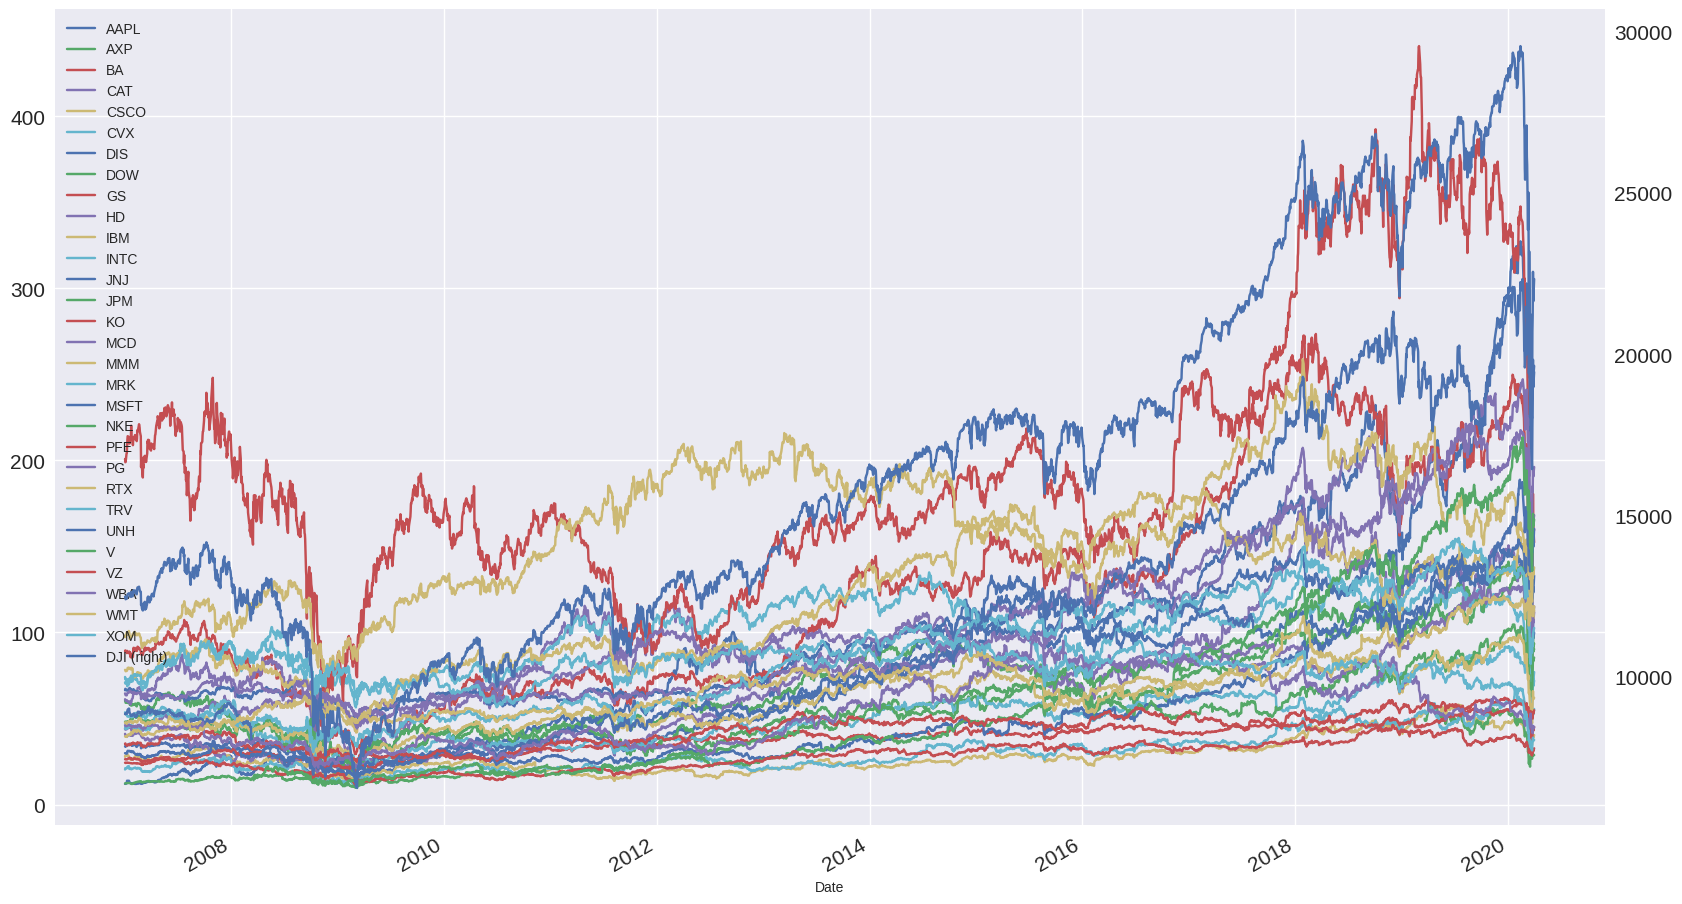

In [15]:
df.plot(figsize = (20, 12), fontsize = 15, secondary_y = "DJI")
plt.show()

In [26]:
df.div(df.iloc[0]).mul(100)

AAPL         AXP          BA         CAT        CSCO  \
Date                                                                      
2007-01-03   100.000000  100.000000  100.000000  100.000000  100.000000   
2007-01-04   102.219565   99.271036  100.403724   99.738391  102.632526   
2007-01-05   101.491641   97.962227   99.977575   98.463050  102.668589   
2007-01-08   101.992838   98.889990   99.742071   98.577503  103.245581   
2007-01-09   110.465394   98.260439   98.687902   99.117068  102.668589   
...                 ...         ...         ...         ...         ...   
2020-03-24  2062.243426  139.247850  143.187174  165.696528  139.199420   
2020-03-25  2050.883039  149.387007  178.008298  171.141266  135.845650   
2020-03-26  2158.806649  154.555997  202.478420  180.673643  146.339713   
2020-03-27  2069.427202  147.001329  181.675455  172.400266  139.992789   
2020-03-30  2128.484413  149.552677  170.774926  182.652059  145.402093   

                   CVX         DIS  DOW          GS          HD  ...  \
Date                                                             ...   
2007-01-03  100.000000  100.000000  NaN  100.000000  100.000000  ...   
2007-01-04   99.027755  100.789470  NaN   99.068356   98.782566  ...   
2007-01-05   99.408203   99.970761  NaN   99.167996   96.883373  ...   
2007-01-08  100.676336  100.877187  NaN  101.499599   96.152914  ...   
2007-01-09   99.520919  100.730991  NaN  101.673974   95.738982  ...   
...                ...         ...  ...         ...         ...  ...   
2020-03-24   93.772019  290.826751  NaN   76.524514  449.768694  ...   
2020-03-25   97.604615  298.562768  NaN   77.286770  442.561470  ...   
2020-03-26  107.622934  312.286036  NaN   82.597645  475.310465  ...   
2020-03-27   96.914186  285.728684  NaN   78.886008  463.963975  ...   
2020-03-30  101.380859  295.806256  NaN   79.523712  477.477496  ...   

                    PG         RTX         TRV         UNH   V          VZ  \
Date                                                                         
2007-01-03  100.000000  100.000000  100.000000  100.000000 NaN  100.000000   
2007-01-04   99.240784  100.095531   99.159662  100.646757 NaN  100.555262   
2007-01-05   98.388595   99.793033   97.871150   99.961955 NaN   98.836588   
2007-01-08   98.605514  100.605007   97.142859  101.426669 NaN   97.329454   
2007-01-09   98.357606   99.458687   96.900094  100.209246 NaN   97.726064   
...                ...         ...         ...         ...  ..         ...   
2020-03-24  160.009289  138.130872  175.051352  418.109196 NaN  141.587733   
2020-03-25  156.368139  153.144408  172.138192  446.052895 NaN  141.446108   
2020-03-26  166.377434  166.597681  184.257702  485.809399 NaN  151.642470   
2020-03-27  170.700336  154.672825  186.647989  461.194595 NaN  149.461582   
2020-03-30  178.184069  156.806249  191.577960  477.991250 NaN  155.126224   

                   WBA         WMT         XOM         DJI  
Date                                                        
2007-01-03  100.000000  100.000000  100.000000  100.000000  
2007-01-04  100.195355  100.483700   98.124411  100.049468  
2007-01-05   98.762753   99.663512   98.826066   99.386672  
2007-01-08   99.175166   98.843324   98.029957   99.590932  
2007-01-09   99.696116   99.663512   97.274316   99.535694  
...                ...         ...         ...         ...  
2020-03-24   98.220100  241.913776   47.820805  165.977616  
2020-03-25   89.950074  230.073614   50.317097  169.950840  
2020-03-26   99.131753  230.956891   52.381594  180.785880  
2020-03-27   95.506838  230.452163   49.858319  173.447797  
2020-03-30   98.024745  242.250272   50.600458  178.984693  

[3334 rows x 31 columns]

In [27]:
norm = df.div(df.iloc[0]).mul(100) # First row would be hundred, others based on this...
norm

AAPL         AXP          BA         CAT        CSCO  \
Date                                                                      
2007-01-03   100.000000  100.000000  100.000000  100.000000  100.000000   
2007-01-04   102.219565   99.271036  100.403724   99.738391  102.632526   
2007-01-05   101.491641   97.962227   99.977575   98.463050  102.668589   
2007-01-08   101.992838   98.889990   99.742071   98.577503  103.245581   
2007-01-09   110.465394   98.260439   98.687902   99.117068  102.668589   
...                 ...         ...         ...         ...         ...   
2020-03-24  2062.243426  139.247850  143.187174  165.696528  139.199420   
2020-03-25  2050.883039  149.387007  178.008298  171.141266  135.845650   
2020-03-26  2158.806649  154.555997  202.478420  180.673643  146.339713   
2020-03-27  2069.427202  147.001329  181.675455  172.400266  139.992789   
2020-03-30  2128.484413  149.552677  170.774926  182.652059  145.402093   

                   CVX         DIS  DOW          GS          HD  ...  \
Date                                                             ...   
2007-01-03  100.000000  100.000000  NaN  100.000000  100.000000  ...   
2007-01-04   99.027755  100.789470  NaN   99.068356   98.782566  ...   
2007-01-05   99.408203   99.970761  NaN   99.167996   96.883373  ...   
2007-01-08  100.676336  100.877187  NaN  101.499599   96.152914  ...   
2007-01-09   99.520919  100.730991  NaN  101.673974   95.738982  ...   
...                ...         ...  ...         ...         ...  ...   
2020-03-24   93.772019  290.826751  NaN   76.524514  449.768694  ...   
2020-03-25   97.604615  298.562768  NaN   77.286770  442.561470  ...   
2020-03-26  107.622934  312.286036  NaN   82.597645  475.310465  ...   
2020-03-27   96.914186  285.728684  NaN   78.886008  463.963975  ...   
2020-03-30  101.380859  295.806256  NaN   79.523712  477.477496  ...   

                    PG         RTX         TRV         UNH   V          VZ  \
Date                                                                         
2007-01-03  100.000000  100.000000  100.000000  100.000000 NaN  100.000000   
2007-01-04   99.240784  100.095531   99.159662  100.646757 NaN  100.555262   
2007-01-05   98.388595   99.793033   97.871150   99.961955 NaN   98.836588   
2007-01-08   98.605514  100.605007   97.142859  101.426669 NaN   97.329454   
2007-01-09   98.357606   99.458687   96.900094  100.209246 NaN   97.726064   
...                ...         ...         ...         ...  ..         ...   
2020-03-24  160.009289  138.130872  175.051352  418.109196 NaN  141.587733   
2020-03-25  156.368139  153.144408  172.138192  446.052895 NaN  141.446108   
2020-03-26  166.377434  166.597681  184.257702  485.809399 NaN  151.642470   
2020-03-27  170.700336  154.672825  186.647989  461.194595 NaN  149.461582   
2020-03-30  178.184069  156.806249  191.577960  477.991250 NaN  155.126224   

                   WBA         WMT         XOM         DJI  
Date                                                        
2007-01-03  100.000000  100.000000  100.000000  100.000000  
2007-01-04  100.195355  100.483700   98.124411  100.049468  
2007-01-05   98.762753   99.663512   98.826066   99.386672  
2007-01-08   99.175166   98.843324   98.029957   99.590932  
2007-01-09   99.696116   99.663512   97.274316   99.535694  
...                ...         ...         ...         ...  
2020-03-24   98.220100  241.913776   47.820805  165.977616  
2020-03-25   89.950074  230.073614   50.317097  169.950840  
2020-03-26   99.131753  230.956891   52.381594  180.785880  
2020-03-27   95.506838  230.452163   49.858319  173.447797  
2020-03-30   98.024745  242.250272   50.600458  178.984693  

[3334 rows x 31 columns]

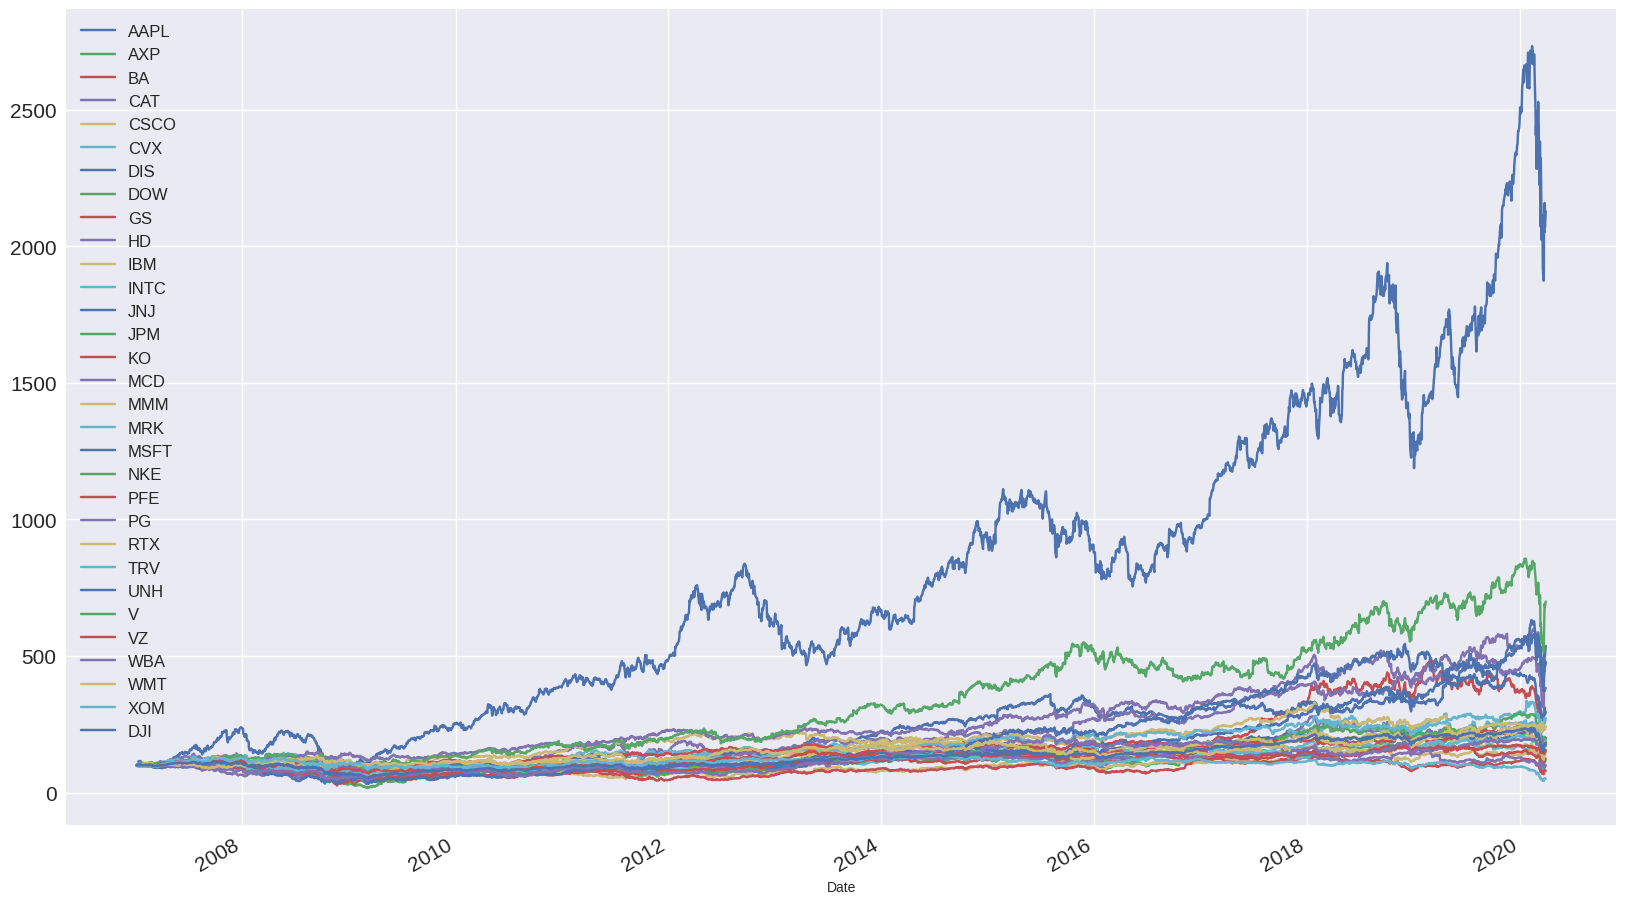

In [28]:
norm.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

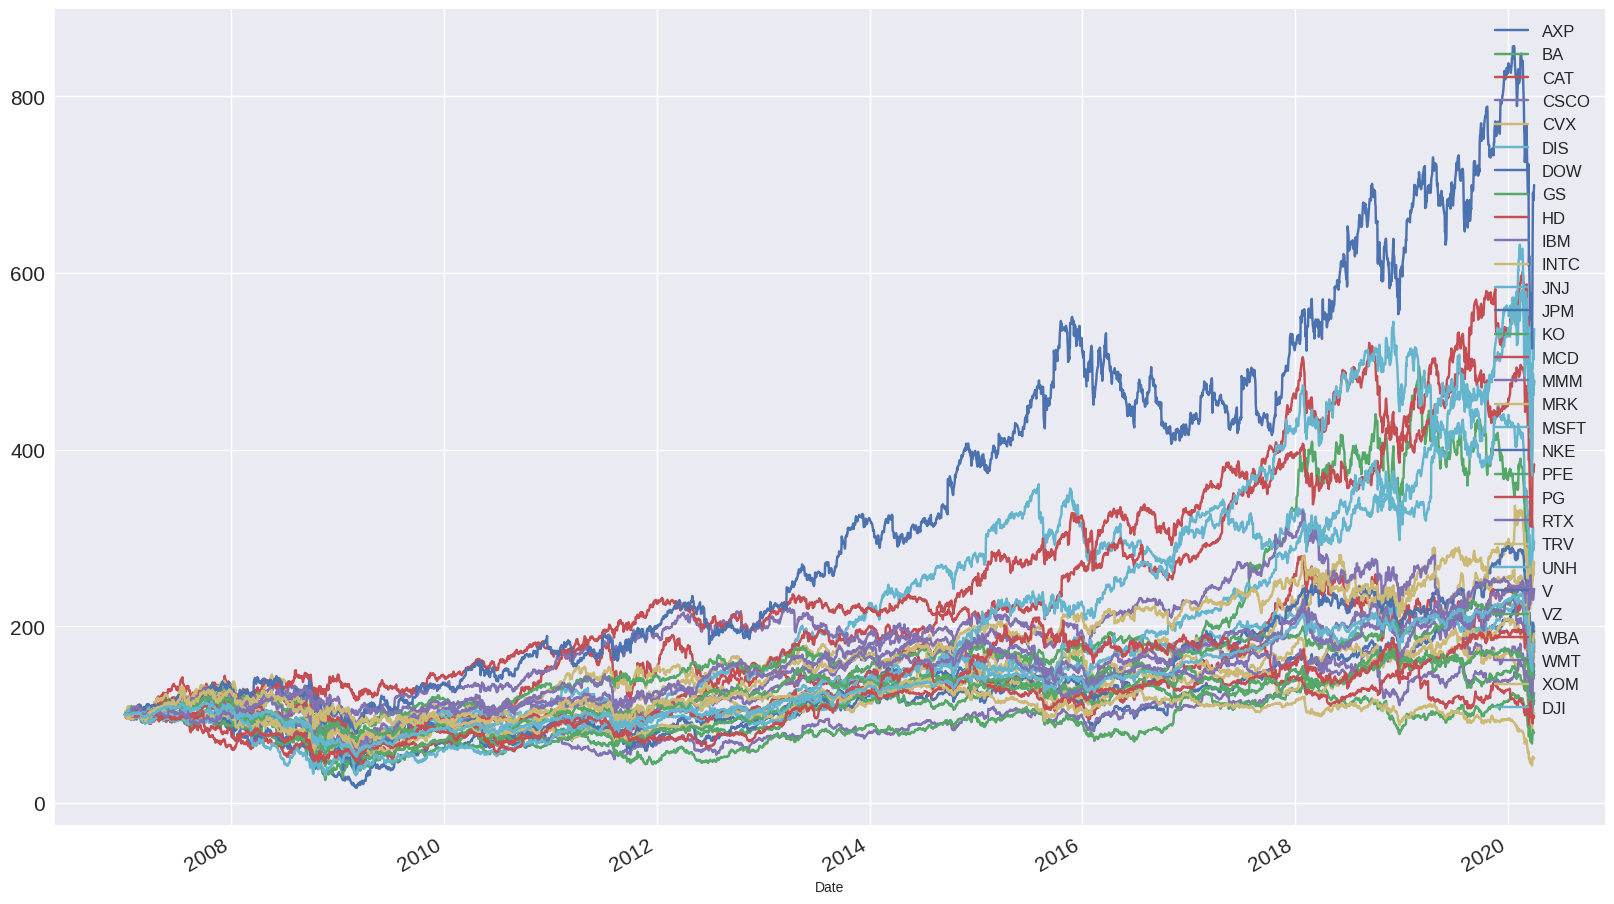

In [29]:
norm.drop(columns =["AAPL"]).plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

In [30]:
ret = df.pct_change()

In [31]:
ret

AAPL       AXP        BA       CAT      CSCO       CVX  \
Date                                                                     
2007-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2007-01-04  0.022196 -0.007290  0.004037 -0.002616  0.026325 -0.009722   
2007-01-05 -0.007121 -0.013184 -0.004244 -0.012787  0.000351  0.003842   
2007-01-08  0.004938  0.009471 -0.002356  0.001162  0.005620  0.012757   
2007-01-09  0.083070 -0.006366 -0.010569  0.005474 -0.005589 -0.011477   
...              ...       ...       ...       ...       ...       ...   
2020-03-24  0.100325  0.218823  0.208862  0.103321  0.115607  0.227407   
2020-03-25 -0.005509  0.072814  0.243186  0.032860 -0.024093  0.040871   
2020-03-26  0.052623  0.034601  0.137466  0.055699  0.077250  0.102642   
2020-03-27 -0.041402 -0.048880 -0.102742 -0.045792 -0.043371 -0.099502   
2020-03-30  0.028538  0.017356 -0.060000  0.059465  0.038640  0.046089   

                 DIS       DOW        GS        HD  ...        PG       RTX  \
Date                                                ...                       
2007-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2007-01-04  0.007895       NaN -0.009316 -0.012174  ... -0.007592  0.000955   
2007-01-05 -0.008123       NaN  0.001006 -0.019226  ... -0.008587 -0.003022   
2007-01-08  0.009067       NaN  0.023512 -0.007540  ...  0.002205  0.008137   
2007-01-09 -0.001449       NaN  0.001718 -0.004305  ... -0.002514 -0.011394   
...              ...       ...       ...       ...  ...       ...       ...   
2020-03-24  0.144123  0.071106  0.138031  0.137508  ...  0.057011  0.157572   
2020-03-25  0.026600  0.067088  0.009961 -0.016024  ... -0.022756  0.108691   
2020-03-26  0.045964 -0.023041  0.068716  0.073999  ...  0.064011  0.087847   
2020-03-27 -0.085042 -0.037736 -0.044936 -0.023872  ...  0.025983 -0.071579   
2020-03-30  0.035270  0.003151  0.008084  0.029126  ...  0.043841  0.013793   

                 TRV       UNH         V        VZ       WBA       WMT  \
Date                                                                     
2007-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2007-01-04 -0.008403  0.006468       NaN  0.005553  0.001954  0.004837   
2007-01-05 -0.012994 -0.006804       NaN -0.017092 -0.014298 -0.008162   
2007-01-08 -0.007441  0.014653       NaN -0.015249  0.004176 -0.008230   
2007-01-09 -0.002499 -0.012003       NaN  0.004075  0.005253  0.008298   
...              ...       ...       ...       ...       ...       ...   
2020-03-24  0.060887  0.127989  0.138426 -0.006361  0.037606  0.006563   
2020-03-25 -0.016642  0.066833  0.046916 -0.001000 -0.084199 -0.048944   
2020-03-26  0.070406  0.089130  0.043887  0.072087  0.102075  0.003839   
2020-03-27  0.012973 -0.050668 -0.043344 -0.014382 -0.036567 -0.002185   
2020-03-30  0.026413  0.036420  0.024821  0.037900  0.026364  0.051195   

                 XOM       DJI  
Date                            
2007-01-03       NaN       NaN  
2007-01-04 -0.018756  0.000495  
2007-01-05  0.007151 -0.006625  
2007-01-08 -0.008056  0.002055  
2007-01-09 -0.007708 -0.000555  
...              ...       ...  
2020-03-24  0.126868  0.113650  
2020-03-25  0.052201  0.023938  
2020-03-26  0.041030  0.063754  
2020-03-27 -0.048171 -0.040590  
2020-03-30  0.014885  0.031923  

[3334 rows x 31 columns]

In [32]:
ret.describe()

AAPL          AXP           BA          CAT         CSCO  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean      0.001124     0.000404     0.000375     0.000393     0.000288   
std       0.020285     0.023861     0.020633     0.020599     0.018732   
min      -0.179195    -0.175949    -0.238484    -0.142822    -0.162107   
25%      -0.007882    -0.007507    -0.008608    -0.008954    -0.007302   
50%       0.000985     0.000643     0.000694     0.000392     0.000443   
75%       0.011166     0.009351     0.009931     0.010251     0.008722   
max       0.139050     0.218823     0.243186     0.147229     0.159505   

               CVX          DIS         DOW           GS           HD  ...  \
count  3333.000000  3333.000000  259.000000  3333.000000  3333.000000  ...   
mean      0.000172     0.000476   -0.001557     0.000221     0.000618  ...   
std       0.018264     0.017384    0.033533     0.024183     0.017243  ...   
min      -0.221248    -0.129846   -0.216577    -0.189596    -0.197938  ...   
25%      -0.007602    -0.006837   -0.014935    -0.009635    -0.006983  ...   
50%       0.000633     0.000572    0.000554     0.000258     0.000528  ...   
75%       0.008351     0.008090    0.012207     0.010234     0.008160  ...   
max       0.227407     0.159722    0.209091     0.264678     0.140666  ...   

                PG          RTX          TRV          UNH            V  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3029.000000   
mean      0.000244     0.000263     0.000362     0.000689     0.000996   
std       0.011926     0.015987     0.018255     0.021072     0.019155   
min      -0.087373    -0.144765    -0.208004    -0.186362    -0.136435   
25%      -0.004799    -0.006487    -0.006244    -0.008082    -0.007500   
50%       0.000250     0.000508     0.000668     0.000616     0.001224   
75%       0.005530     0.007680     0.007360     0.009279     0.009248   
max       0.120090     0.157572     0.255556     0.347550     0.149973   

                VZ          WBA          WMT          XOM          DJI  
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000  
mean      0.000225     0.000153     0.000349    -0.000077     0.000252  
std       0.013661     0.017826     0.012961     0.015945     0.012395  
min      -0.080685    -0.149873    -0.101832    -0.139525    -0.129265  
25%      -0.006508    -0.008169    -0.005572    -0.007159    -0.003935  
50%       0.000525     0.000105     0.000540     0.000000     0.000560  
75%       0.006994     0.008873     0.006329     0.007235     0.005288  
max       0.146324     0.166355     0.117085     0.171905     0.113650  

[8 rows x 31 columns]

In [33]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"] * 252
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [34]:
summary = summary_ann(ret)
summary

Return      Risk
AAPL  0.283326  0.322011
AXP   0.101747  0.378787
BA    0.094477  0.327538
CAT   0.099013  0.327003
CSCO  0.072630  0.297358
CVX   0.043249  0.289927
DIS   0.119955  0.275958
DOW  -0.392383  0.532319
GS    0.055702  0.383889
HD    0.155732  0.273726
IBM   0.038751  0.234153
INTC  0.123515  0.308791
JNJ   0.068433  0.178406
JPM   0.133400  0.409842
KO    0.064733  0.190356
MCD   0.122734  0.205694
MMM   0.069922  0.232708
MRK   0.074456  0.253712
MSFT  0.167063  0.283320
NKE   0.187755  0.285948
PFE   0.042036  0.226339
PG    0.061575  0.189312
RTX   0.066274  0.253784
TRV   0.091190  0.289788
UNH   0.173708  0.334501
V     0.250987  0.304080
VZ    0.056631  0.216857
WBA   0.038608  0.282974
WMT   0.087997  0.205743
XOM  -0.019440  0.253121
DJI   0.063421  0.196760

In [35]:
summary = summary.merge(more_info.loc[:, ["Ticker", "Company"]],
                        how = "left", left_index= True, right_on = "Ticker")

In [36]:
summary.set_index("Company", inplace = True)

In [37]:
summary

Return      Risk Ticker
Company                                            
Apple Inc.                0.283326  0.322011   AAPL
American Express          0.101747  0.378787    AXP
Boeing                    0.094477  0.327538     BA
Caterpillar Inc.          0.099013  0.327003    CAT
Cisco Systems             0.072630  0.297358   CSCO
Chevron Corporation       0.043249  0.289927    CVX
The Walt Disney Company   0.119955  0.275958    DIS
Dow Inc.                 -0.392383  0.532319    DOW
Goldman Sachs             0.055702  0.383889     GS
The Home Depot            0.155732  0.273726     HD
IBM                       0.038751  0.234153    IBM
Intel                     0.123515  0.308791   INTC
Johnson & Johnson         0.068433  0.178406    JNJ
JPMorgan Chase            0.133400  0.409842    JPM
The Coca-Cola Company     0.064733  0.190356     KO
McDonald's                0.122734  0.205694    MCD
3M                        0.069922  0.232708    MMM
Merck & Co.               0.074456  0.253712    MRK
Microsoft                 0.167063  0.283320   MSFT
Nike                      0.187755  0.285948    NKE
Pfizer                    0.042036  0.226339    PFE
Procter & Gamble          0.061575  0.189312     PG
Raytheon Technologies     0.066274  0.253784    RTX
The Travelers Companies   0.091190  0.289788    TRV
UnitedHealth Group        0.173708  0.334501    UNH
Visa Inc.                 0.250987  0.304080      V
Verizon                   0.056631  0.216857     VZ
Walgreens Boots Alliance  0.038608  0.282974    WBA
Walmart                   0.087997  0.205743    WMT
ExxonMobil               -0.019440  0.253121    XOM
NaN                       0.063421  0.196760    DJI

In [38]:
summary.rename(index = {np.nan : "Dow Jones"}, inplace = True)

In [39]:
summary

Return      Risk Ticker
Company                                            
Apple Inc.                0.283326  0.322011   AAPL
American Express          0.101747  0.378787    AXP
Boeing                    0.094477  0.327538     BA
Caterpillar Inc.          0.099013  0.327003    CAT
Cisco Systems             0.072630  0.297358   CSCO
Chevron Corporation       0.043249  0.289927    CVX
The Walt Disney Company   0.119955  0.275958    DIS
Dow Inc.                 -0.392383  0.532319    DOW
Goldman Sachs             0.055702  0.383889     GS
The Home Depot            0.155732  0.273726     HD
IBM                       0.038751  0.234153    IBM
Intel                     0.123515  0.308791   INTC
Johnson & Johnson         0.068433  0.178406    JNJ
JPMorgan Chase            0.133400  0.409842    JPM
The Coca-Cola Company     0.064733  0.190356     KO
McDonald's                0.122734  0.205694    MCD
3M                        0.069922  0.232708    MMM
Merck & Co.               0.074456  0.253712    MRK
Microsoft                 0.167063  0.283320   MSFT
Nike                      0.187755  0.285948    NKE
Pfizer                    0.042036  0.226339    PFE
Procter & Gamble          0.061575  0.189312     PG
Raytheon Technologies     0.066274  0.253784    RTX
The Travelers Companies   0.091190  0.289788    TRV
UnitedHealth Group        0.173708  0.334501    UNH
Visa Inc.                 0.250987  0.304080      V
Verizon                   0.056631  0.216857     VZ
Walgreens Boots Alliance  0.038608  0.282974    WBA
Walmart                   0.087997  0.205743    WMT
ExxonMobil               -0.019440  0.253121    XOM
Dow Jones                 0.063421  0.196760    DJI

## Explanatory Data Analysis

In [40]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3334 entries, 2007-01-03 to 2020-03-30
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3333 non-null   float64
 1   AXP     3333 non-null   float64
 2   BA      3333 non-null   float64
 3   CAT     3333 non-null   float64
 4   CSCO    3333 non-null   float64
 5   CVX     3333 non-null   float64
 6   DIS     3333 non-null   float64
 7   DOW     259 non-null    float64
 8   GS      3333 non-null   float64
 9   HD      3333 non-null   float64
 10  IBM     3333 non-null   float64
 11  INTC    3333 non-null   float64
 12  JNJ     3333 non-null   float64
 13  JPM     3333 non-null   float64
 14  KO      3333 non-null   float64
 15  MCD     3333 non-null   float64
 16  MMM     3333 non-null   float64
 17  MRK     3333 non-null   float64
 18  MSFT    3333 non-null   float64
 19  NKE     3333 non-null   float64
 20  PFE     3333 non-null   float64
 21  PG      3333 non-nu

In [41]:
summary2 = summary.drop(index = "Dow Inc.")
summary2

Return      Risk Ticker
Company                                            
Apple Inc.                0.283326  0.322011   AAPL
American Express          0.101747  0.378787    AXP
Boeing                    0.094477  0.327538     BA
Caterpillar Inc.          0.099013  0.327003    CAT
Cisco Systems             0.072630  0.297358   CSCO
Chevron Corporation       0.043249  0.289927    CVX
The Walt Disney Company   0.119955  0.275958    DIS
Goldman Sachs             0.055702  0.383889     GS
The Home Depot            0.155732  0.273726     HD
IBM                       0.038751  0.234153    IBM
Intel                     0.123515  0.308791   INTC
Johnson & Johnson         0.068433  0.178406    JNJ
JPMorgan Chase            0.133400  0.409842    JPM
The Coca-Cola Company     0.064733  0.190356     KO
McDonald's                0.122734  0.205694    MCD
3M                        0.069922  0.232708    MMM
Merck & Co.               0.074456  0.253712    MRK
Microsoft                 0.167063  0.283320   MSFT
Nike                      0.187755  0.285948    NKE
Pfizer                    0.042036  0.226339    PFE
Procter & Gamble          0.061575  0.189312     PG
Raytheon Technologies     0.066274  0.253784    RTX
The Travelers Companies   0.091190  0.289788    TRV
UnitedHealth Group        0.173708  0.334501    UNH
Visa Inc.                 0.250987  0.304080      V
Verizon                   0.056631  0.216857     VZ
Walgreens Boots Alliance  0.038608  0.282974    WBA
Walmart                   0.087997  0.205743    WMT
ExxonMobil               -0.019440  0.253121    XOM
Dow Jones                 0.063421  0.196760    DJI

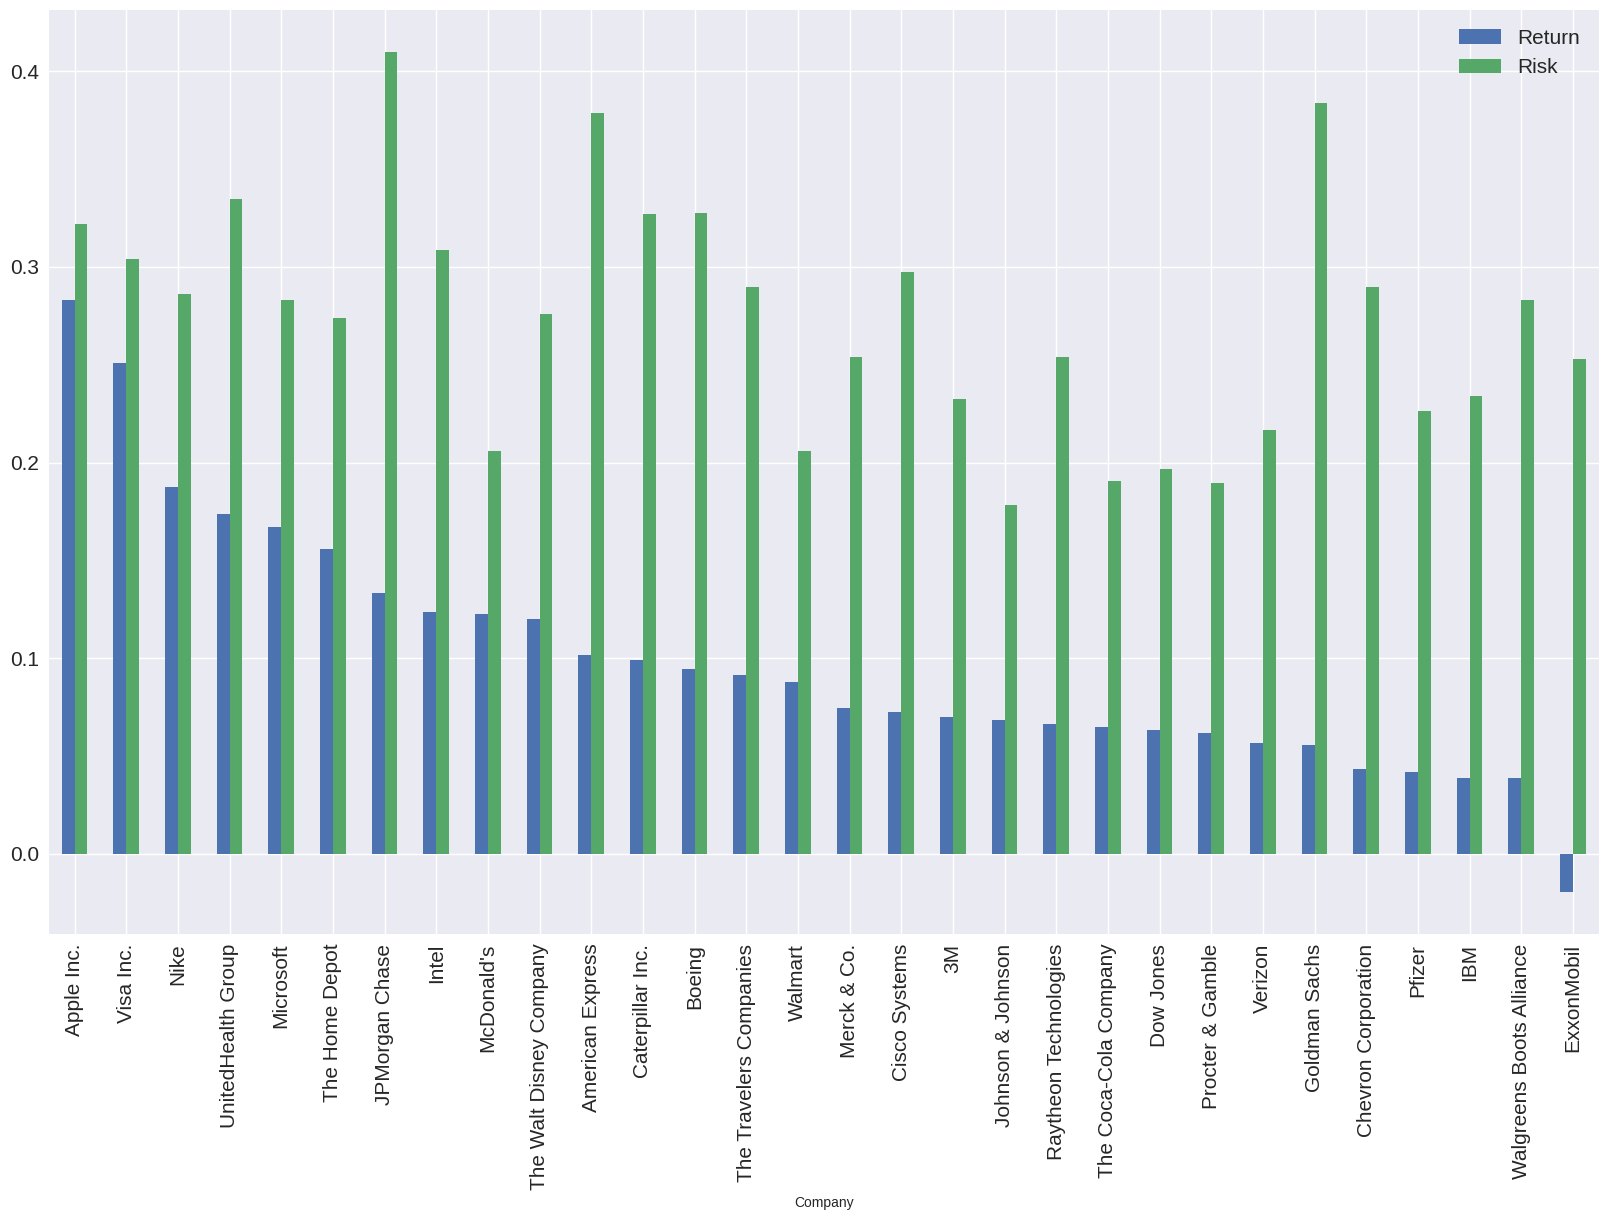

In [42]:
summary2.sort_values(by = "Return", ascending = False).plot(kind = "bar", figsize = (20, 12), 
                                                            fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

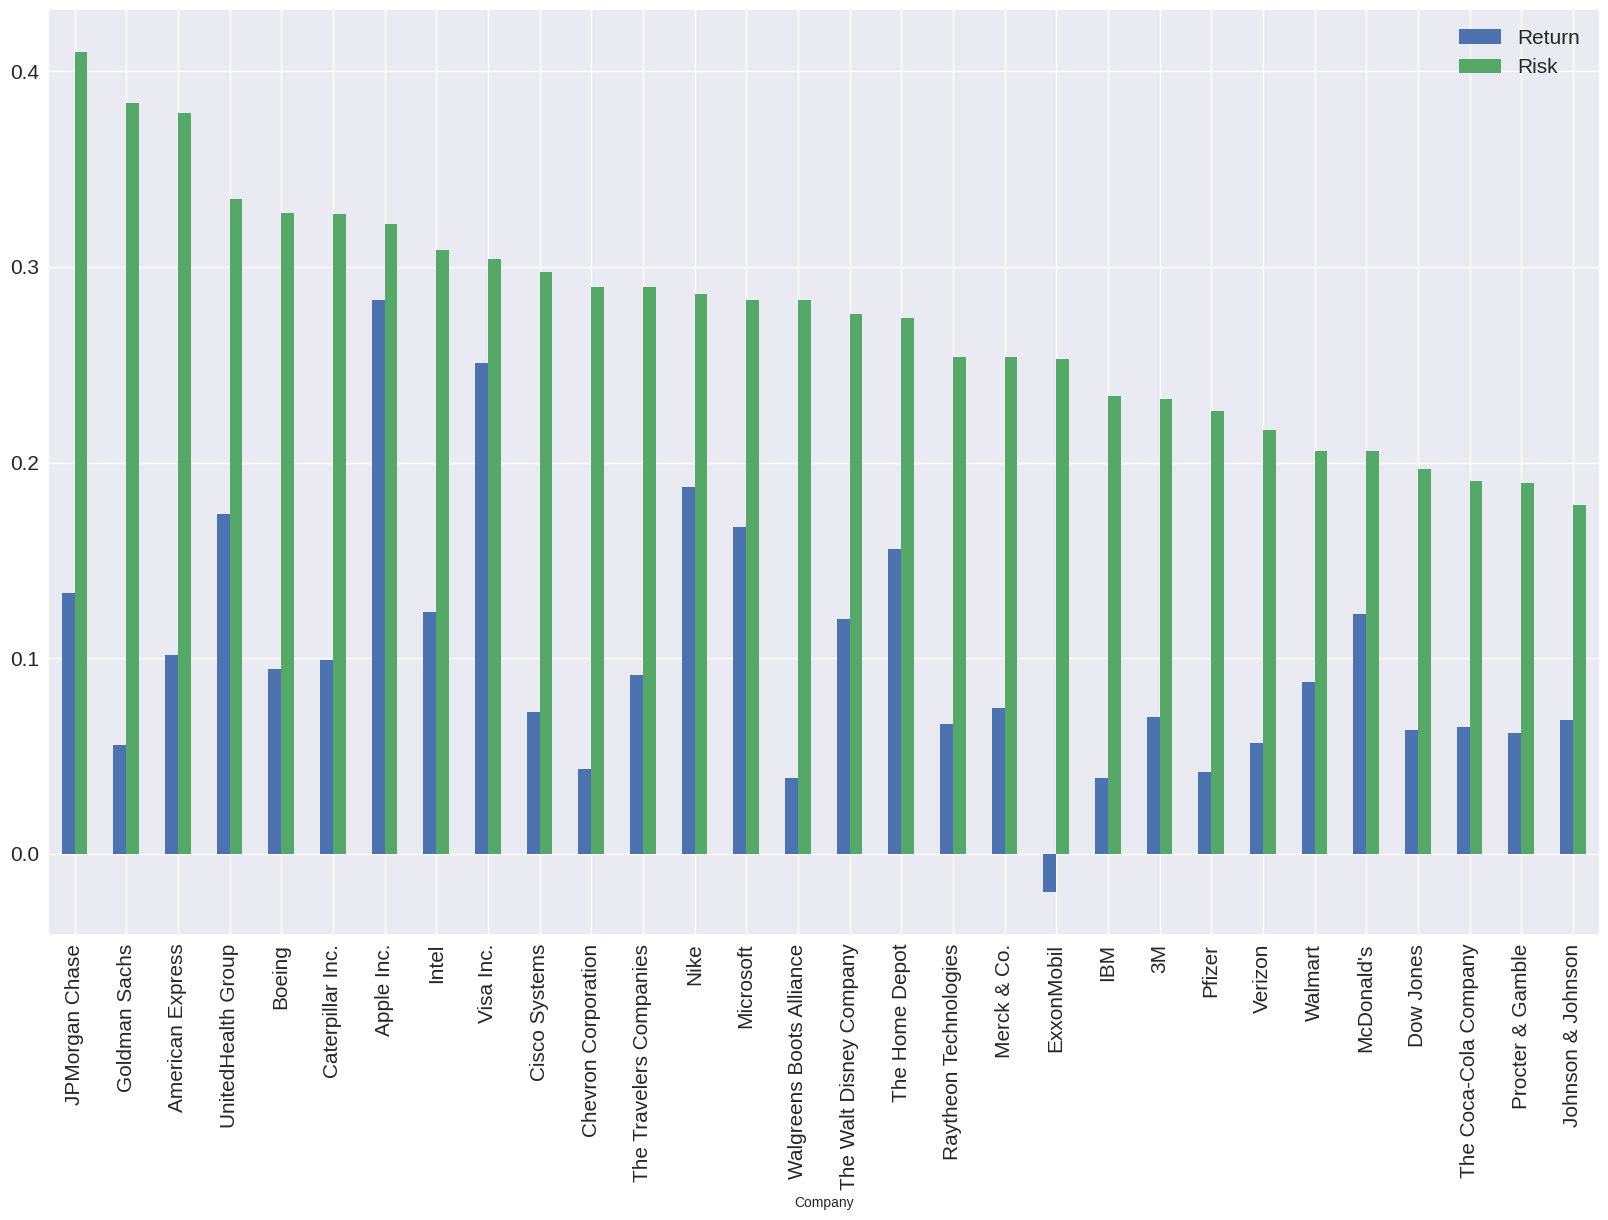

In [43]:
summary2.sort_values(by = "Risk", ascending = False).plot(kind = "bar", figsize = (20, 12), 
                                                          fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [44]:
summary2.set_index("Ticker", inplace = True)

In [45]:
summary2

Return      Risk
Ticker                    
AAPL    0.283326  0.322011
AXP     0.101747  0.378787
BA      0.094477  0.327538
CAT     0.099013  0.327003
CSCO    0.072630  0.297358
CVX     0.043249  0.289927
DIS     0.119955  0.275958
GS      0.055702  0.383889
HD      0.155732  0.273726
IBM     0.038751  0.234153
INTC    0.123515  0.308791
JNJ     0.068433  0.178406
JPM     0.133400  0.409842
KO      0.064733  0.190356
MCD     0.122734  0.205694
MMM     0.069922  0.232708
MRK     0.074456  0.253712
MSFT    0.167063  0.283320
NKE     0.187755  0.285948
PFE     0.042036  0.226339
PG      0.061575  0.189312
RTX     0.066274  0.253784
TRV     0.091190  0.289788
UNH     0.173708  0.334501
V       0.250987  0.304080
VZ      0.056631  0.216857
WBA     0.038608  0.282974
WMT     0.087997  0.205743
XOM    -0.019440  0.253121
DJI     0.063421  0.196760

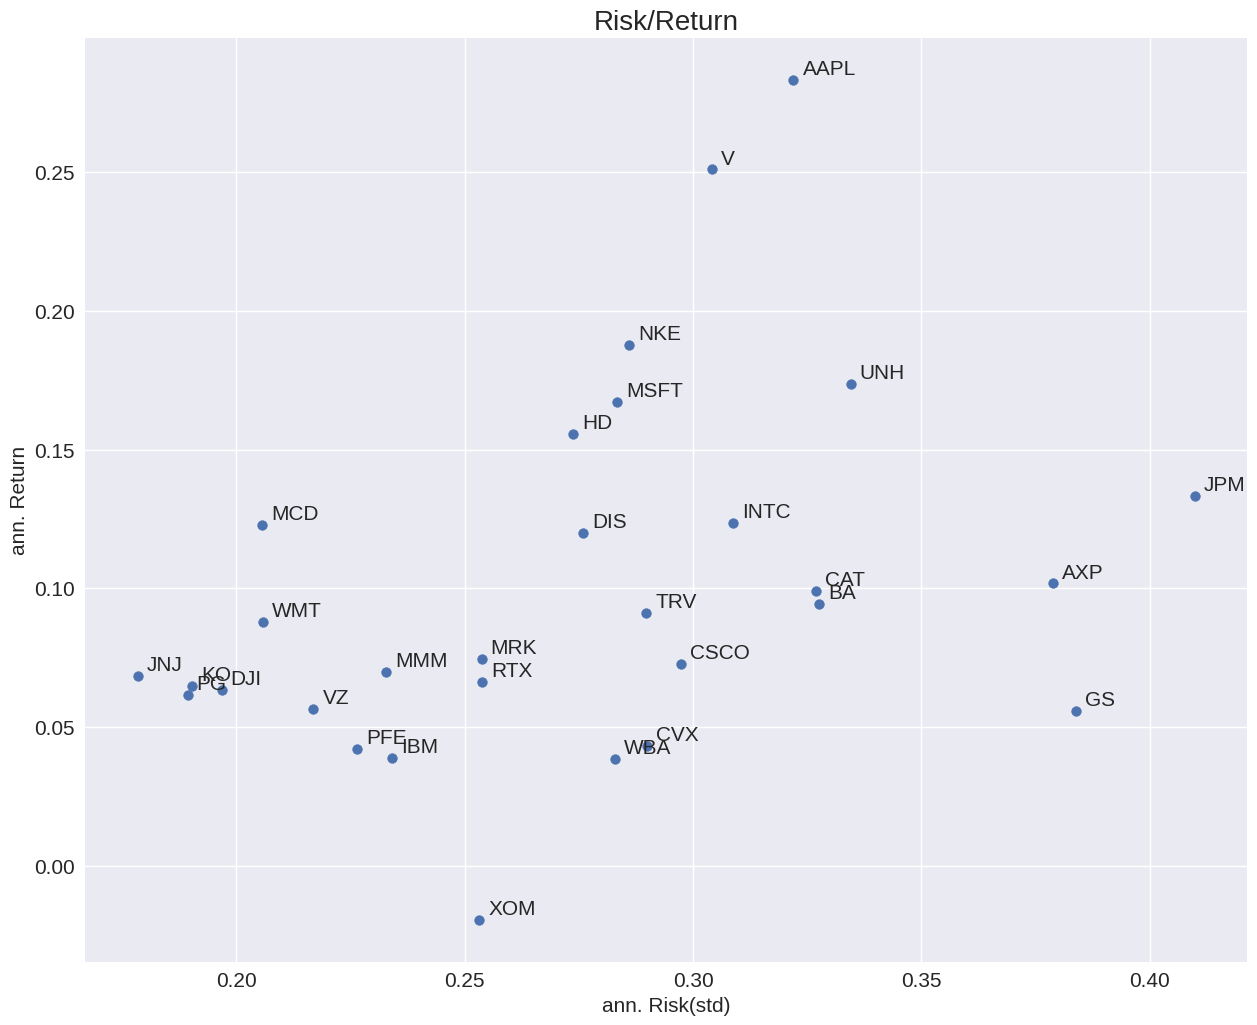

In [46]:
summary2.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (15,12), s = 50, fontsize = 15)
for i in summary2.index:
    plt.annotate(i, xy=(summary2.loc[i, "Risk"]+0.002, summary2.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [47]:
corr_matrix = ret.corr()
corr_matrix

AAPL       AXP        BA       CAT      CSCO       CVX       DIS  \
AAPL  1.000000  0.480043  0.438086  0.487226  0.525349  0.449052  0.468580   
AXP   0.480043  1.000000  0.550139  0.595983  0.552228  0.573059  0.627933   
BA    0.438086  0.550139  1.000000  0.553999  0.485747  0.571662  0.566121   
CAT   0.487226  0.595983  0.553999  1.000000  0.568403  0.617253  0.585367   
CSCO  0.525349  0.552228  0.485747  0.568403  1.000000  0.533596  0.583010   
CVX   0.449052  0.573059  0.571662  0.617253  0.533596  1.000000  0.600033   
DIS   0.468580  0.627933  0.566121  0.585367  0.583010  0.600033  1.000000   
DOW   0.631347  0.585071  0.502373  0.759624  0.596760  0.541230  0.524249   
GS    0.476691  0.681464  0.501920  0.565734  0.546383  0.556975  0.584596   
HD    0.463329  0.602880  0.527704  0.526940  0.531232  0.531485  0.595523   
IBM   0.494420  0.513133  0.503336  0.541264  0.582772  0.539462  0.555564   
INTC  0.528961  0.546372  0.493909  0.560372  0.616330  0.526387  0.542007   
JNJ   0.374524  0.465516  0.455899  0.460741  0.499564  0.535266  0.516336   
JPM   0.455397  0.725708  0.486084  0.547190  0.531002  0.528494  0.580046   
KO    0.358931  0.442789  0.454037  0.423251  0.439710  0.497889  0.507333   
MCD   0.392270  0.480059  0.472915  0.413936  0.446849  0.522907  0.504939   
MMM   0.479010  0.586926  0.542899  0.652016  0.590420  0.585514  0.611552   
MRK   0.344897  0.445356  0.382399  0.393216  0.436592  0.487085  0.476794   
MSFT  0.528013  0.552998  0.501638  0.542841  0.621946  0.552316  0.568012   
NKE   0.436083  0.530853  0.494603  0.495236  0.502382  0.473204  0.551900   
PFE   0.392486  0.514583  0.443778  0.480505  0.491815  0.513815  0.526017   
PG    0.363393  0.469506  0.417925  0.411556  0.476467  0.490095  0.530826   
RTX   0.498010  0.632661  0.680807  0.655219  0.587765  0.652896  0.649854   
TRV   0.426388  0.604635  0.465494  0.473390  0.482416  0.570728  0.543394   
UNH   0.390673  0.463337  0.437456  0.399110  0.405247  0.497396  0.475446   
V     0.500869  0.608325  0.470835  0.501120  0.510966  0.509172  0.531920   
VZ    0.355473  0.462106  0.378064  0.433708  0.459482  0.475042  0.487684   
WBA   0.358347  0.396338  0.368819  0.402600  0.427154  0.390131  0.442776   
WMT   0.322451  0.372094  0.331806  0.357269  0.416851  0.360023  0.423168   
XOM   0.440548  0.543933  0.562232  0.617244  0.550696  0.850689  0.604449   
DJI   0.621928  0.771359  0.736430  0.760203  0.727891  0.787176  0.781622   

           DOW        GS        HD  ...        PG       RTX       TRV  \
AAPL  0.631347  0.476691  0.463329  ...  0.363393  0.498010  0.426388   
AXP   0.585071  0.681464  0.602880  ...  0.469506  0.632661  0.604635   
BA    0.502373  0.501920  0.527704  ...  0.417925  0.680807  0.465494   
CAT   0.759624  0.565734  0.526940  ...  0.411556  0.655219  0.473390   
CSCO  0.596760  0.546383  0.531232  ...  0.476467  0.587765  0.482416   
CVX   0.541230  0.556975  0.531485  ...  0.490095  0.652896  0.570728   
DIS   0.524249  0.584596  0.595523  ...  0.530826  0.649854  0.543394   
DOW   1.000000  0.660349  0.568539  ...  0.495249  0.589982  0.565861   
GS    0.660349  1.000000  0.566183  ...  0.404795  0.572156  0.569984   
HD    0.568539  0.566183  1.000000  ...  0.481375  0.603150  0.552381   
IBM   0.629546  0.518887  0.541899  ...  0.484164  0.590724  0.501860   
INTC  0.593640  0.509816  0.550159  ...  0.451415  0.560966  0.509085   
JNJ   0.469982  0.442605  0.480622  ...  0.604163  0.550162  0.511533   
JPM   0.692558  0.762699  0.583594  ...  0.430837  0.586752  0.612159   
KO    0.487214  0.393324  0.476439  ...  0.599030  0.525071  0.485523   
MCD   0.472648  0.407024  0.525060  ...  0.482948  0.547632  0.499462   
MMM   0.551245  0.550030  0.571257  ...  0.525266  0.675163  0.541727   
MRK   0.439409  0.402627  0.418962  ...  0.494780  0.466280  0.483816   
MSFT  0.635527  0.524916  0.535461  ...  0.480055  0.588504  0.515120   
NKE   0.602751  0.462532  0.559782  ...  0.438705  0.

In [48]:
import seaborn as sns

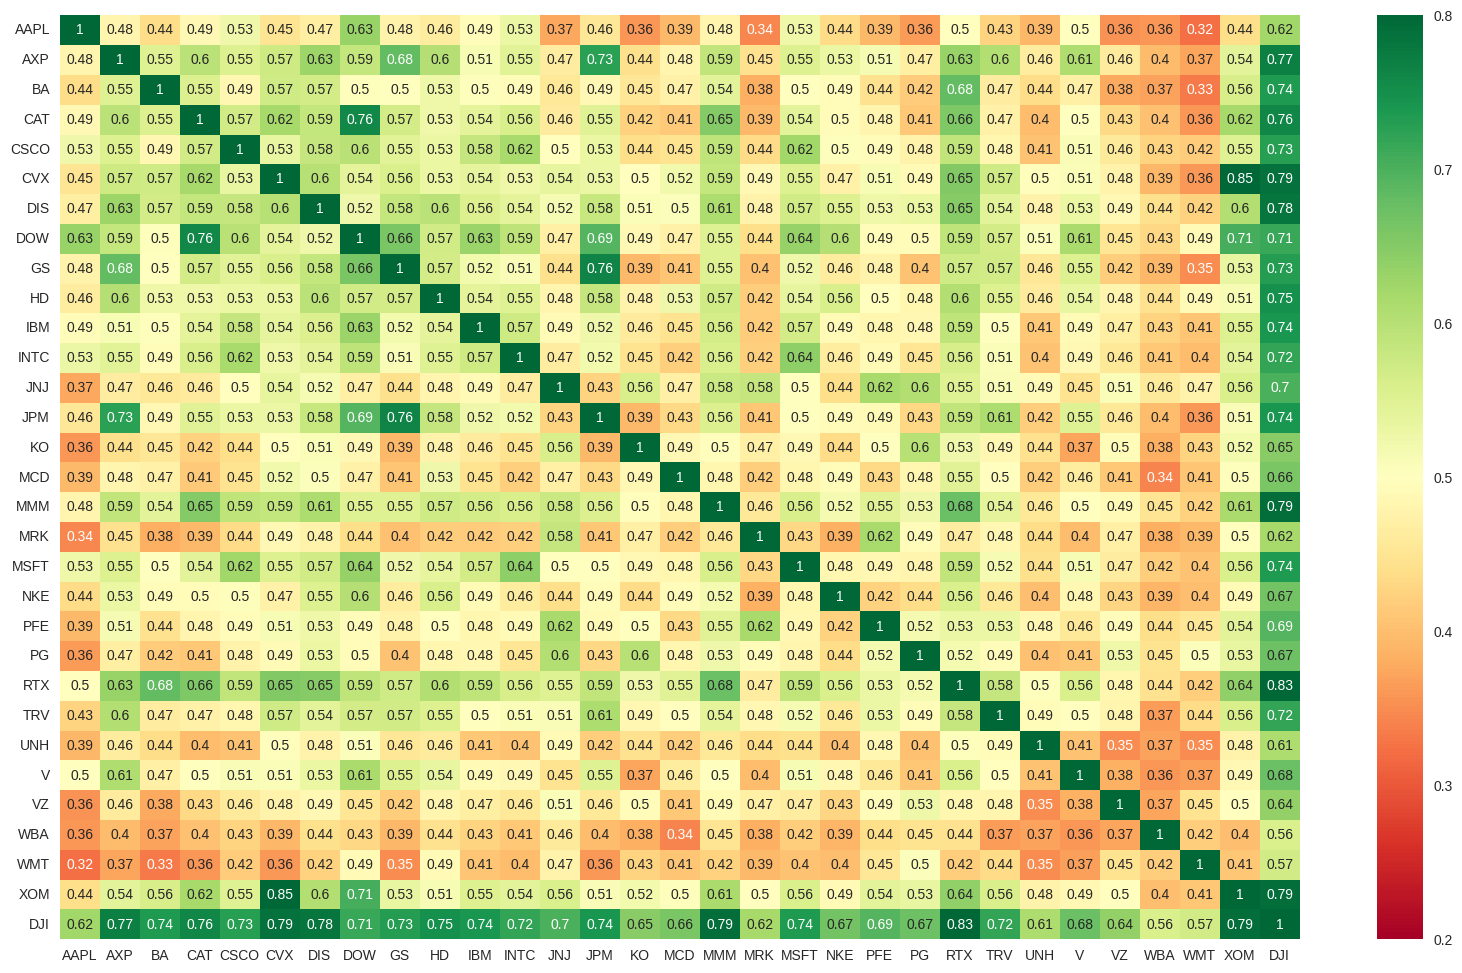

In [49]:
plt.figure(figsize = (20, 12))
sns.heatmap(corr_matrix, cmap='RdYlGn',annot=True, vmin = 0.2, vmax = 0.8)
plt.show()

## Index Tracking - an Introduction

Plan: Track the DJI with only __10 Stocks__ (Tracking Portfolio).

Criteria to select Tracking Portfolio: Those 10 Stocks with the __lowest individual Tracking Error__ (TE) in the Training/Fitting Period.

- Training/Fitting Period: 2017 & 2018
- (Forward) Testing Period: 2019

Once we have identified the 10 Tracking Stocks we need to find their __optimal weights__ in the Tracking Portfolio that __minimize TE__.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3334 entries, 2007-01-03 to 2020-03-30
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3333 non-null   float64
 1   AXP     3333 non-null   float64
 2   BA      3333 non-null   float64
 3   CAT     3333 non-null   float64
 4   CSCO    3333 non-null   float64
 5   CVX     3333 non-null   float64
 6   DIS     3333 non-null   float64
 7   DOW     260 non-null    float64
 8   GS      3333 non-null   float64
 9   HD      3333 non-null   float64
 10  IBM     3333 non-null   float64
 11  INTC    3333 non-null   float64
 12  JNJ     3333 non-null   float64
 13  JPM     3333 non-null   float64
 14  KO      3333 non-null   float64
 15  MCD     3333 non-null   float64
 16  MMM     3333 non-null   float64
 17  MRK     3333 non-null   float64
 18  MSFT    3333 non-null   float64
 19  NKE     3333 non-null   float64
 20  PFE     3333 non-null   float64
 21  PG      3333 non-nu

In [53]:
df2 = df.loc["2017":"2018"].copy()
df2

AAPL        AXP          BA         CAT       CSCO  \
Date                                                                   
2017-01-03  116.150002  75.349998  156.970001   93.989998  30.540001   
2017-01-04  116.019997  76.260002  158.619995   93.570000  30.100000   
2017-01-05  116.610001  75.320000  158.710007   93.000000  30.170000   
2017-01-06  117.910004  75.470001  159.100006   93.040001  30.230000   
2017-01-09  118.989998  75.860001  158.320007   92.370003  30.180000   
...                ...        ...         ...         ...        ...   
2018-12-24  146.830002  89.500000  294.160004  116.949997  40.279999   
2018-12-26  157.169998  93.839996  313.929993  124.760002  42.470001   
2018-12-27  156.149994  94.680000  317.140015  126.669998  42.910000   
2018-12-28  156.229996  94.419998  316.380005  125.610001  42.770000   
2018-12-31  157.740005  95.320000  322.500000  127.070000  43.330002   

                   CVX         DIS  DOW          GS          HD  ...  \
Date                                                             ...   
2017-01-03  117.849998  106.080002  NaN  241.570007  134.309998  ...   
2017-01-04  117.820000  107.440002  NaN  243.130005  135.500000  ...   
2017-01-05  117.309998  107.379997  NaN  241.320007  133.899994  ...   
2017-01-06  116.839996  108.980003  NaN  244.899994  133.529999  ...   
2017-01-09  115.839996  108.360001  NaN  242.889999  134.309998  ...   
...                ...         ...  ...         ...         ...  ...   
2018-12-24  100.989998  100.349998  NaN  156.350006  158.139999  ...   
2018-12-26  107.389999  105.830002  NaN  162.929993  168.279999  ...   
2018-12-27  109.320000  106.519997  NaN  165.410004  170.320007  ...   
2018-12-28  108.650002  107.300003  NaN  163.029999  170.220001  ...   
2018-12-31  108.790001  109.650002  NaN  167.050003  171.820007  ...   

                   PG        RTX         TRV         UNH           V  \
Date                                                                   
2017-01-03  84.199997  69.748268  120.900002  161.449997   79.500000   
2017-01-04  84.500000  69.792320  120.250000  161.910004   80.150002   
2017-01-05  85.059998  70.075516  118.330002  162.179993   81.089996   
2017-01-06  85.029999  70.830711  118.269997  162.410004   82.209999   
2017-01-09  84.400002  70.169922  117.320000  161.949997   81.750000   
...               ...        ...         ...         ...         ...   
2018-12-24  87.360001  64.229073  112.629997  232.940002  121.730003   
2018-12-26  90.089996  66.714912  117.169998  243.350006  130.229996   
2018-12-27  92.019997  66.557587  118.669998  245.970001  132.009995   
2018-12-28  91.180000  66.293266  118.239998  246.240005  130.940002   
2018-12-31  91.919998  67.010696  119.750000  249.119995  131.940002   

                   VZ        WBA        WMT        XOM           DJI  
Date                                                                  
2017-01-03  54.580002  82.959999  68.660004  90.889999  19881.759766  
2017-01-04  54.520000  82.980003  69.059998  89.889999  19942.160156  
2017-01-05  54.639999  83.029999  69.209999  88.550003  19899.289062  
2017-01-06  53.259998  83.099998  68.260002  88.500000  19963.800781  
2017-01-09  52.680000  82.550003  68.709999  87.040001  19887.380859  
...               ...        ...        ...        ...           ...  
2018-12-24  53.049999  65.260002  85.820000  65.510002  21792.199219  
2018-12-26  54.439999  67.720001  90.410004  68.639999  22878.449219  
2018-12-27  55.150002  68.360001  91.589996  68.940002  23138.820312  
2018-12-28  55.270000  68.050003  92.129997  68.169998  23062.400391  
2018-12-31  56.220001  68.330002  93.150002  68.190002  23327.460938  

[502 rows x 31 columns]

In [54]:
norm2 = df2.div(df2.iloc[0]).mul(100)
norm2

AAPL         AXP          BA         CAT        CSCO  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04   99.888072  101.207702  101.051152   99.553146   98.559265   
2017-01-05  100.396039   99.960187  101.108496   98.946699   98.788471   
2017-01-06  101.515284  100.159260  101.356950   98.989257   98.984933   
2017-01-09  102.445111  100.676844  100.860041   98.276418   98.821216   
...                ...         ...         ...         ...         ...   
2018-12-24  126.414120  118.779034  187.398867  124.428130  131.892592   
2018-12-26  135.316398  124.538817  199.993623  132.737531  139.063523   
2018-12-27  134.438219  125.653619  202.038614  134.769657  140.504252   
2018-12-28  134.507097  125.308560  201.554439  133.641880  140.045839   
2018-12-31  135.807149  126.502988  205.453270  135.195236  141.879504   

                   CVX         DIS  DOW          GS          HD  ...  \
Date                                                             ...   
2017-01-03  100.000000  100.000000  NaN  100.000000  100.000000  ...   
2017-01-04   99.974545  101.282052  NaN  100.645775  100.886012  ...   
2017-01-05   99.541790  101.225486  NaN   99.896510   99.694733  ...   
2017-01-06   99.142977  102.733787  NaN  101.378477   99.419255  ...   
2017-01-09   98.294440  102.149320  NaN  100.546422  100.000000  ...   
...                ...         ...  ...         ...         ...  ...   
2018-12-24   85.693678   94.598413  NaN   64.722441  117.742538  ...   
2018-12-26   91.124311   99.764329  NaN   67.446284  125.292236  ...   
2018-12-27   92.761987  100.414776  NaN   68.472906  126.811116  ...   
2018-12-28   92.193469  101.150077  NaN   67.487682  126.736657  ...   
2018-12-31   92.312263  103.365384  NaN   69.151798  127.927936  ...   

                    PG         RTX         TRV         UNH           V  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  100.356298  100.063159   99.462364  100.284922  100.817612   
2017-01-05  101.021378  100.469184   97.874277  100.452150  101.999995   
2017-01-06  100.985750  101.551928   97.824644  100.594616  103.408804   
2017-01-09  100.237535  100.604537   97.038874  100.309693  102.830189   
...                ...         ...         ...         ...         ...   
2018-12-24  103.752974   92.086978   93.159633  144.279967  153.119501   
2018-12-26  106.995249   95.650995   96.914803  150.727786  163.811315   
2018-12-27  109.287411   95.425433   98.155498  152.350577  166.050308   
2018-12-28  108.289791   95.046469   97.799832  152.517814  164.704406   
2018-12-31  109.168648   96.075069   99.048799  154.301641  165.962267   

                    VZ         WBA         WMT         XOM         DJI  
Date                                                                    
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000  
2017-01-04   99.890067  100.024113  100.582572   98.899769  100.303798  
2017-01-05  100.109926  100.084378  100.801042   97.425463  100.088168  
2017-01-06   97.581525  100.168755   99.417417   97.370448  100.412645  
2017-01-09   96.518869   99.505791  100.072816   95.764112  100.028273  
...                ...         ...         ...         ...         ...  
2018-12-24   97.196771   78.664420  124.992711   72.076139  109.609006  
2018-12-26   99.743490   81.629703  131.677831   75.519859  115.072556  
2018-12-27  101.044338   82.401159  133.396434   75.849932  116.382154  
2018-12-28  101.264197   82.027488  134.182919   75.002749  115.997782  
2018-12-31  103.004762   82.364998  135.668506   75.024758  117.330967  

[502 rows x 31 columns]

In [55]:
ret2 = ret.loc["2017":"2018"].copy()
ret2

AAPL       AXP        BA       CAT      CSCO       CVX  \
Date                                                                     
2017-01-03  0.002849  0.017144  0.008286  0.013479  0.010589  0.001274   
2017-01-04 -0.001119  0.012077  0.010512 -0.004469 -0.014407 -0.000255   
2017-01-05  0.005085 -0.012326  0.000567 -0.006092  0.002326 -0.004329   
2017-01-06  0.011148  0.001992  0.002457  0.000430  0.001989 -0.004006   
2017-01-09  0.009159  0.005168 -0.004903 -0.007201 -0.001654 -0.008559   
...              ...       ...       ...       ...       ...       ...   
2018-12-24 -0.025874 -0.020037 -0.034116 -0.025985 -0.037515 -0.030899   
2018-12-26  0.070422  0.048492  0.067208  0.066781  0.054369  0.063373   
2018-12-27 -0.006490  0.008951  0.010225  0.015309  0.010360  0.017972   
2018-12-28  0.000512 -0.002746 -0.002396 -0.008368 -0.003263 -0.006129   
2018-12-31  0.009665  0.009532  0.019344  0.011623  0.013093  0.001289   

                 DIS  DOW        GS        HD  ...        PG       RTX  \
Date                                           ...                       
2017-01-03  0.017847  NaN  0.008854  0.001715  ...  0.001427  0.011038   
2017-01-04  0.012821  NaN  0.006458  0.008860  ...  0.003563  0.000632   
2017-01-05 -0.000558  NaN -0.007445 -0.011808  ...  0.006627  0.004058   
2017-01-06  0.014900  NaN  0.014835 -0.002763  ... -0.000353  0.010777   
2017-01-09 -0.005689  NaN -0.008207  0.005841  ... -0.007409 -0.009329   
...              ...  ...       ...       ...  ...       ...       ...   
2018-12-24 -0.037133  NaN -0.023118 -0.014581  ... -0.039683 -0.038802   
2018-12-26  0.054609  NaN  0.042085  0.064120  ...  0.031250  0.038703   
2018-12-27  0.006520  NaN  0.015221  0.012123  ...  0.021423 -0.002358   
2018-12-28  0.007323  NaN -0.014389 -0.000587  ... -0.009128 -0.003971   
2018-12-31  0.021901  NaN  0.024658  0.009400  ...  0.008116  0.010822   

                 TRV       UNH         V        VZ       WBA       WMT  \
Date                                                                     
2017-01-03 -0.012416  0.008810  0.018970  0.022480  0.002417 -0.006655   
2017-01-04 -0.005376  0.002849  0.008176 -0.001099  0.000241  0.005826   
2017-01-05 -0.015967  0.001668  0.011728  0.002201  0.000602  0.002172   
2017-01-06 -0.000507  0.001418  0.013812 -0.025256  0.000843 -0.013726   
2017-01-09 -0.008032 -0.002832 -0.005595 -0.010890 -0.006618  0.006592   
...              ...       ...       ...       ...       ...       ...   
2018-12-24 -0.029554 -0.022657 -0.020361 -0.034050 -0.029735 -0.015035   
2018-12-26  0.040309  0.044690  0.069827  0.026202  0.037695  0.053484   
2018-12-27  0.012802  0.010766  0.013668  0.013042  0.009451  0.013052   
2018-12-28 -0.003623  0.001098 -0.008105  0.002176 -0.004535  0.005896   
2018-12-31  0.012771  0.011696  0.007637  0.017188  0.004115  0.011071   

                 XOM       DJI  
Date                            
2017-01-03  0.006980  0.006030  
2017-01-04 -0.011002  0.003038  
2017-01-05 -0.014907 -0.002150  
2017-01-06 -0.000565  0.003242  
2017-01-09 -0.016497 -0.003828  
...              ...       ...  
2018-12-24 -0.038315 -0.029100  
2018-12-26  0.047779  0.049846  
2018-12-27  0.004371  0.011381  
2018-12-28 -0.011169 -0.003303  
2018-12-31  0.000293  0.011493  

[502 rows x 31 columns]

In [56]:
ret_diff = ret2.sub(ret2.DJI, axis = 0)
ret_diff

AAPL       AXP        BA       CAT      CSCO       CVX  \
Date                                                                     
2017-01-03 -0.003180  0.011114  0.002257  0.007449  0.004559 -0.004755   
2017-01-04 -0.004157  0.009039  0.007474 -0.007507 -0.017445 -0.003293   
2017-01-05  0.007235 -0.010177  0.002717 -0.003942  0.004475 -0.002179   
2017-01-06  0.007906 -0.001250 -0.000785 -0.002812 -0.001253 -0.007248   
2017-01-09  0.012987  0.008996 -0.001075 -0.003373  0.002174 -0.004731   
...              ...       ...       ...       ...       ...       ...   
2018-12-24  0.003226  0.009063 -0.005015  0.003116 -0.008414 -0.001799   
2018-12-26  0.020576 -0.001354  0.017362  0.016935  0.004524  0.013527   
2018-12-27 -0.017870 -0.002429 -0.001155  0.003929 -0.001020  0.006591   
2018-12-28  0.003815  0.000557  0.000906 -0.005066  0.000040 -0.002826   
2018-12-31 -0.001828 -0.001961  0.007851  0.000130  0.001600 -0.010205   

                 DIS  DOW        GS        HD  ...        PG       RTX  \
Date                                           ...                       
2017-01-03  0.011817  NaN  0.002824 -0.004314  ... -0.004602  0.005009   
2017-01-04  0.009783  NaN  0.003420  0.005822  ...  0.000525 -0.002406   
2017-01-05  0.001591  NaN -0.005295 -0.009658  ...  0.008777  0.006207   
2017-01-06  0.011659  NaN  0.011593 -0.006005  ... -0.003595  0.007535   
2017-01-09 -0.001861  NaN -0.004379  0.009669  ... -0.003581 -0.005501   
...              ...  ...       ...       ...  ...       ...       ...   
2018-12-24 -0.008033  NaN  0.005983  0.014519  ... -0.010583 -0.009702   
2018-12-26  0.004763  NaN -0.007761  0.014275  ... -0.018596 -0.011143   
2018-12-27 -0.004861  NaN  0.003841  0.000742  ...  0.010042 -0.013739   
2018-12-28  0.010625  NaN -0.011086  0.002716  ... -0.005826 -0.000669   
2018-12-31  0.010408  NaN  0.013165 -0.002094  ... -0.003377 -0.000671   

                 TRV       UNH         V        VZ       WBA       WMT  \
Date                                                                     
2017-01-03 -0.018446  0.002781  0.012940  0.016451 -0.003613 -0.012685   
2017-01-04 -0.008414 -0.000189  0.005138 -0.004137 -0.002797  0.002788   
2017-01-05 -0.013817  0.003817  0.013878  0.004351  0.002752  0.004322   
2017-01-06 -0.003749 -0.001824  0.010570 -0.028498 -0.002399 -0.016968   
2017-01-09 -0.004205  0.000996 -0.001767 -0.007062 -0.002791  0.010420   
...              ...       ...       ...       ...       ...       ...   
2018-12-24 -0.000453  0.006444  0.008740 -0.004949 -0.000635  0.014065   
2018-12-26 -0.009537 -0.005156  0.019981 -0.023644 -0.012150  0.003638   
2018-12-27  0.001421 -0.000614  0.002287  0.001661 -0.001930  0.001671   
2018-12-28 -0.000321  0.004400 -0.004803  0.005479 -0.001232  0.009199   
2018-12-31  0.001277  0.000203 -0.003856  0.005695 -0.007379 -0.000422   

                 XOM  DJI  
Date                       
2017-01-03  0.000950  0.0  
2017-01-04 -0.014040  0.0  
2017-01-05 -0.012757  0.0  
2017-01-06 -0.003807  0.0  
2017-01-09 -0.012669  0.0  
...              ...  ...  
2018-12-24 -0.009214  0.0  
2018-12-26 -0.002067  0.0  
2018-12-27 -0.007010  0.0  
2018-12-28 -0.007867  0.0  
2018-12-31 -0.011200  0.0  

[502 rows x 31 columns]

In [59]:
ret_diff.agg(["mean", "std"]).T

mean       std
AAPL  0.000362  0.011576
AXP   0.000210  0.008355
BA    0.001214  0.011468
CAT   0.000409  0.012363
CSCO  0.000446  0.009521
CVX  -0.000445  0.009945
DIS  -0.000198  0.009633
DOW        NaN       NaN
GS   -0.000979  0.010002
HD    0.000196  0.008481
IBM  -0.001035  0.010426
INTC  0.000289  0.013633
JNJ  -0.000079  0.009373
JPM  -0.000047  0.008256
KO   -0.000071  0.008480
MCD   0.000445  0.010414
MMM  -0.000164  0.007863
MRK   0.000218  0.010336
MSFT  0.000713  0.009659
NKE   0.000517  0.014070
PFE   0.000274  0.008306
PG   -0.000139  0.010192
RTX  -0.000358  0.008402
TRV  -0.000353  0.008641
UNH   0.000588  0.008733
V     0.000760  0.008307
VZ   -0.000192  0.011958
WBA  -0.000639  0.012929
WMT   0.000317  0.012288
XOM  -0.000864  0.008589
DJI   0.000000  0.000000

## Selecting the Tracking Stocks

In [60]:
def tracking_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Premium"] = summary["mean"] * 252
    summary["TE"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [61]:
tracking = tracking_ann(ret_diff)
tracking

Premium        TE
AAPL  0.091152  0.183767
AXP   0.053010  0.132638
BA    0.306013  0.182054
CAT   0.103005  0.196256
CSCO  0.112351  0.151141
CVX  -0.112171  0.157867
DIS  -0.049997  0.152914
DOW        NaN       NaN
GS   -0.246714  0.158781
HD    0.049276  0.134628
IBM  -0.260736  0.165511
INTC  0.072864  0.216424
JNJ  -0.019996  0.148793
JPM  -0.011811  0.131067
KO   -0.017858  0.134622
MCD   0.112212  0.165324
MMM  -0.041338  0.124822
MRK   0.055004  0.164078
MSFT  0.179702  0.153330
NKE   0.130164  0.223351
PFE   0.069015  0.131856
PG   -0.035091  0.161794
RTX  -0.090333  0.133377
TRV  -0.088862  0.137179
UNH   0.148181  0.138631
V     0.191612  0.131870
VZ   -0.048357  0.189822
WBA  -0.161049  0.205239
WMT   0.079991  0.195073
XOM  -0.217854  0.136345
DJI   0.000000  0.000000

In [62]:
tracking.sort_values(by = "TE")

Premium        TE
DJI   0.000000  0.000000
MMM  -0.041338  0.124822
JPM  -0.011811  0.131067
PFE   0.069015  0.131856
V     0.191612  0.131870
AXP   0.053010  0.132638
RTX  -0.090333  0.133377
KO   -0.017858  0.134622
HD    0.049276  0.134628
XOM  -0.217854  0.136345
TRV  -0.088862  0.137179
UNH   0.148181  0.138631
JNJ  -0.019996  0.148793
CSCO  0.112351  0.151141
DIS  -0.049997  0.152914
MSFT  0.179702  0.153330
CVX  -0.112171  0.157867
GS   -0.246714  0.158781
PG   -0.035091  0.161794
MRK   0.055004  0.164078
MCD   0.112212  0.165324
IBM  -0.260736  0.165511
BA    0.306013  0.182054
AAPL  0.091152  0.183767
VZ   -0.048357  0.189822
WMT   0.079991  0.195073
CAT   0.103005  0.196256
WBA  -0.161049  0.205239
INTC  0.072864  0.216424
NKE   0.130164  0.223351
DOW        NaN       NaN

In [63]:
noa = 10

In [64]:
tracking_stocks = tracking.sort_values(by = "TE").index[:noa+1]

In [65]:
tracking_stocks

Index(['DJI', 'MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM',
       'TRV'],
      dtype='object')

In [67]:
norm_track = norm2.loc[:, tracking_stocks]
norm_track

DJI         MMM         JPM         PFE           V  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  100.303798  100.151645   99.633154  100.878791  100.817612   
2017-01-05  100.088168   99.809044   98.716035  101.848487  101.999995   
2017-01-06  100.412645  100.101091   98.727501  101.454544  103.408804   
2017-01-09  100.028273   99.561922   98.796282  101.424246  102.830189   
...                ...         ...         ...         ...         ...   
2018-12-24  109.609006  100.320130  105.628793  122.878786  153.119501   
2018-12-26  115.072556  104.611059  110.008019  127.848481  163.811315   
2018-12-27  116.382154  107.104742  111.246128  129.848480  166.050308   
2018-12-28  115.997782  106.357760  111.005386  130.181815  164.704406   
2018-12-31  117.330967  107.014878  111.911039  132.272732  165.962267   

                   AXP         RTX          KO          HD         XOM  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  101.207702  100.063159   99.641154  100.886012   98.899769   
2017-01-05   99.960187  100.469184   99.880385   99.694733   97.425463   
2017-01-06  100.159260  101.551928   99.856465   99.419255   97.370448   
2017-01-09  100.676844  100.604537   98.851676  100.000000   95.764112   
...                ...         ...         ...         ...         ...   
2018-12-24  118.779034   92.086978  109.952153  117.742538   72.076139   
2018-12-26  124.538817   95.650995  112.296649  125.292236   75.519859   
2018-12-27  125.653619   95.425433  113.708133  126.811116   75.849932   
2018-12-28  125.308560   95.046469  112.918664  126.736657   75.002749   
2018-12-31  126.502988   96.075069  113.277510  127.927936   75.024758   

                   TRV  
Date                    
2017-01-03  100.000000  
2017-01-04   99.462364  
2017-01-05   97.874277  
2017-01-06   97.824644  
2017-01-09   97.038874  
...                ...  
2018-12-24   93.159633  
2018-12-26   96.914803  
2018-12-27   98.155498  
2018-12-28   97.799832  
2018-12-31   99.048799  

[502 rows x 11 columns]

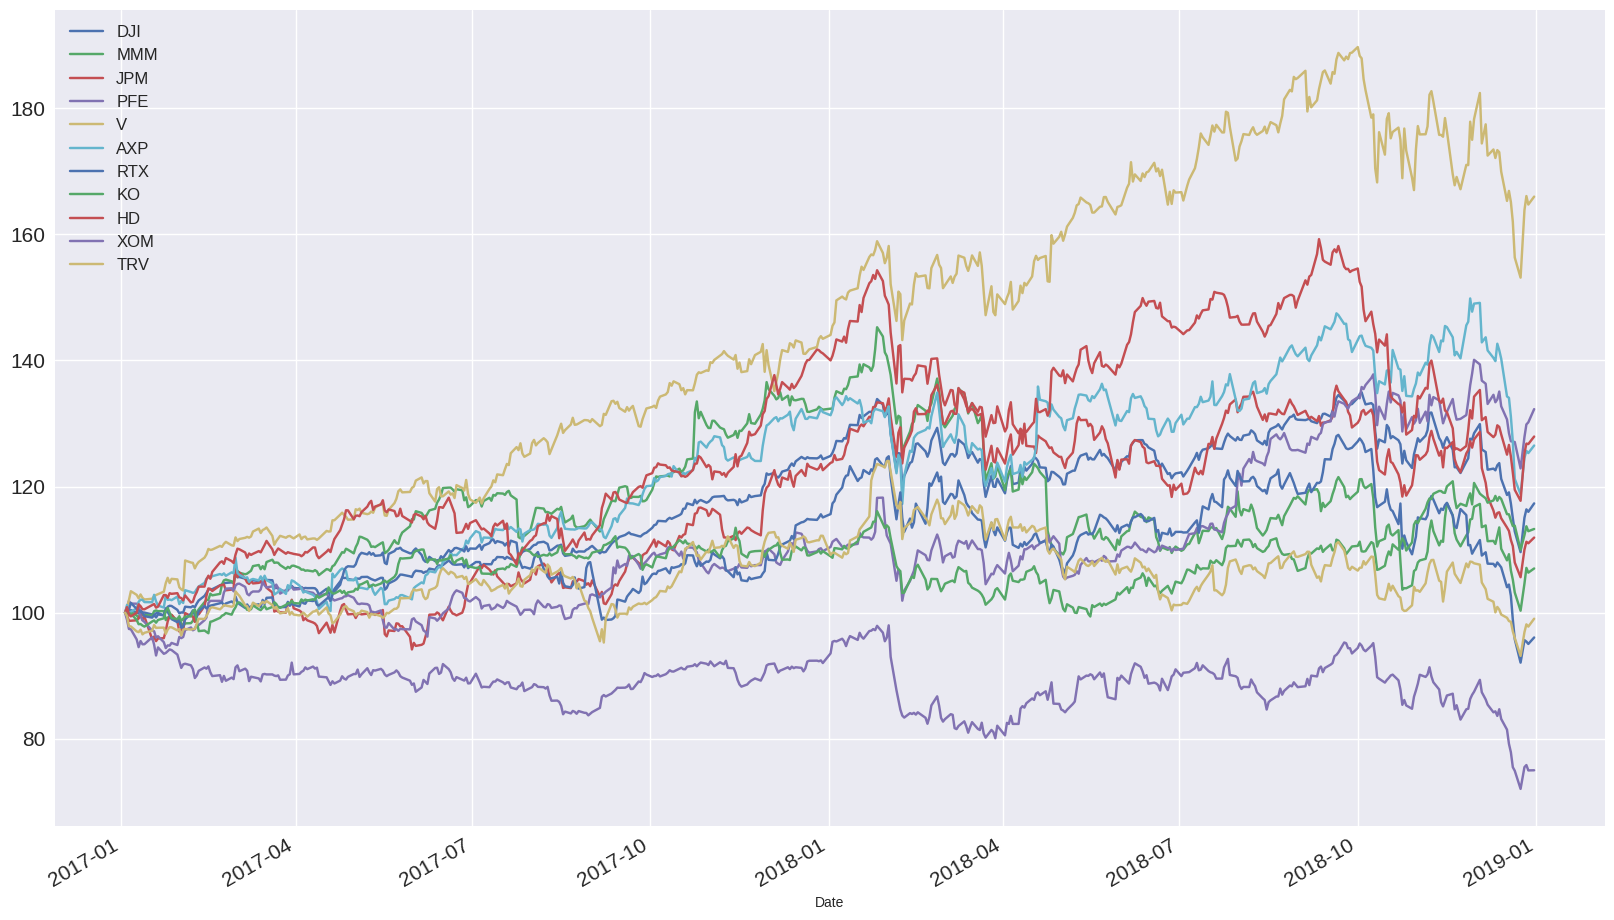

In [68]:
norm_track.plot(figsize= (20,12), fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [69]:
tracking_stocks = tracking_stocks[1:] # Drop the Dow Jones Index
tracking_stocks

Index(['MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM', 'TRV'], dtype='object')

## Index Tracking - A simple Tracking Portfolio

In [70]:
tracking_stocks

Index(['MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM', 'TRV'], dtype='object')

In [77]:
#equal weights (starting point of optimization)
eweights = np.full(noa, 1/noa)
eweights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [78]:
ret2.loc[:, tracking_stocks].mean(axis=1)

Date
2017-01-03    0.007562
2017-01-04    0.001641
2017-01-05   -0.003983
2017-01-06    0.002168
2017-01-09   -0.004350
                ...   
2018-12-24   -0.027788
2018-12-26    0.045523
2018-12-27    0.011286
2018-12-28   -0.004372
2018-12-31    0.008403
Length: 502, dtype: float64

In [79]:
ret2.loc[:, tracking_stocks].dot(eweights)

Date
2017-01-03    0.007562
2017-01-04    0.001641
2017-01-05   -0.003983
2017-01-06    0.002168
2017-01-09   -0.004350
                ...   
2018-12-24   -0.027788
2018-12-26    0.045523
2018-12-27    0.011286
2018-12-28   -0.004372
2018-12-31    0.008403
Length: 502, dtype: float64

In [80]:
#calculate portfolio returns (based on weights)
def port_ret(weights):
    return ret2.loc[:, tracking_stocks].dot(weights)

In [81]:
#define function to be minimized -> minimize tracking error of tracking portfolio
def tracking_error(weights): 
     return port_ret(weights).sub(ret2.DJI).std() * np.sqrt(252)

In [82]:
tracking_error(eweights)

0.04120933686266802

In [90]:
ew_port = port_ret(eweights)[1:].add(1).cumprod().mul(100)
ew_port

Date
2017-01-04    100.164136
2017-01-05     99.765133
2017-01-06     99.981424
2017-01-09     99.546547
2017-01-10     99.482801
                 ...    
2018-12-24    108.298000
2018-12-26    113.228018
2018-12-27    114.505929
2018-12-28    114.005345
2018-12-31    114.963346
Length: 501, dtype: float64

In [84]:
norm_track["EW_Port"] = ew_port
norm_track.iloc[0, -1] = 100

In [91]:
norm_track

DJI         MMM         JPM         PFE           V  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  100.303798  100.151645   99.633154  100.878791  100.817612   
2017-01-05  100.088168   99.809044   98.716035  101.848487  101.999995   
2017-01-06  100.412645  100.101091   98.727501  101.454544  103.408804   
2017-01-09  100.028273   99.561922   98.796282  101.424246  102.830189   
...                ...         ...         ...         ...         ...   
2018-12-24  109.609006  100.320130  105.628793  122.878786  153.119501   
2018-12-26  115.072556  104.611059  110.008019  127.848481  163.811315   
2018-12-27  116.382154  107.104742  111.246128  129.848480  166.050308   
2018-12-28  115.997782  106.357760  111.005386  130.181815  164.704406   
2018-12-31  117.330967  107.014878  111.911039  132.272732  165.962267   

                   AXP         RTX          KO          HD         XOM  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  101.207702  100.063159   99.641154  100.886012   98.899769   
2017-01-05   99.960187  100.469184   99.880385   99.694733   97.425463   
2017-01-06  100.159260  101.551928   99.856465   99.419255   97.370448   
2017-01-09  100.676844  100.604537   98.851676  100.000000   95.764112   
...                ...         ...         ...         ...         ...   
2018-12-24  118.779034   92.086978  109.952153  117.742538   72.076139   
2018-12-26  124.538817   95.650995  112.296649  125.292236   75.519859   
2018-12-27  125.653619   95.425433  113.708133  126.811116   75.849932   
2018-12-28  125.308560   95.046469  112.918664  126.736657   75.002749   
2018-12-31  126.502988   96.075069  113.277510  127.927936   75.024758   

                   TRV     EW_Port  
Date                                
2017-01-03  100.000000  100.000000  
2017-01-04   99.462364  100.164136  
2017-01-05   97.874277   99.765133  
2017-01-06   97.824644   99.981424  
2017-01-09   97.038874   99.546547  
...                ...         ...  
2018-12-24   93.159633  108.298000  
2018-12-26   96.914803  113.228018  
2018-12-27   98.155498  114.505929  
2018-12-28   97.799832  114.005345  
2018-12-31   99.048799  114.963346  

[502 rows x 12 columns]

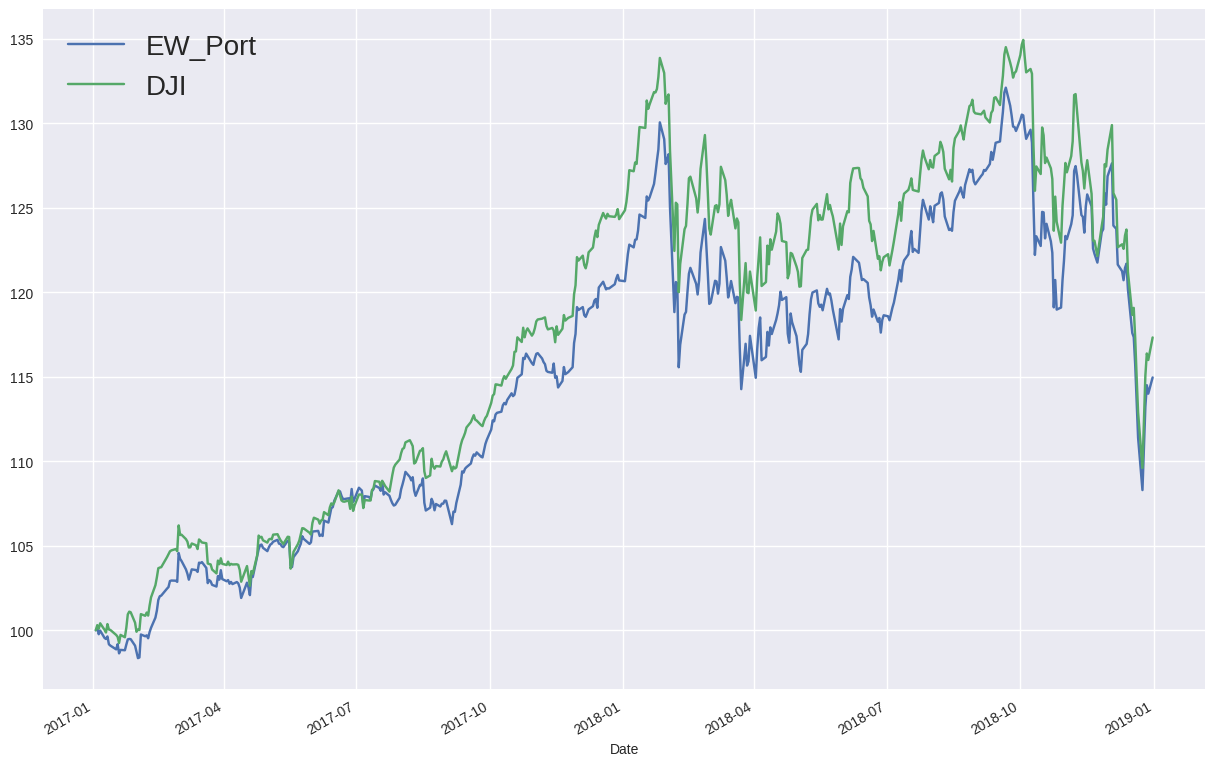

In [92]:
norm_track[["EW_Port", "DJI"]].plot(figsize = (15, 10))
plt.legend(fontsize = 20, loc = 2)
plt.show()

## Index Tracking - The optimal Tracking Portfolio

In [93]:
import scipy.optimize as sco #import scipy optimize

In [94]:
#constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})
cons

{'type': 'eq', 'fun': <function __main__.<lambda>(x)>}

In [95]:
#bounds: all weights shall be between 0 and 1 -> can be changed
bnds =  tuple((0,1) for x in range(noa))
bnds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [96]:
#run optimization based on function to be minimized, starting with equal weights and based on respective bounds and constraints
opts = sco.minimize(tracking_error, eweights, method = "SLSQP", bounds = bnds, constraints= cons)

In [97]:
#output of optimization
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.03796156173948106
       x: [ 1.310e-01  1.445e-01  5.985e-02  1.677e-01  4.029e-02
            1.005e-01  7.688e-02  1.096e-01  1.146e-01  5.508e-02]
     nit: 7
     jac: [ 7.441e-03  7.563e-03  7.450e-03  7.411e-03  7.372e-03
            7.337e-03  7.254e-03  7.539e-03  7.372e-03  7.685e-03]
    nfev: 77
    njev: 7

In [98]:
#getting the optimal weights
optimal_weights = opts["x"]
optimal_weights

array([0.13101952, 0.14451523, 0.05984737, 0.16765083, 0.04028627,
       0.10054676, 0.07688202, 0.10956916, 0.11460304, 0.05507981])

In [99]:
pd.Series(index = tracking_stocks, data = optimal_weights)

MMM    0.131020
JPM    0.144515
PFE    0.059847
V      0.167651
AXP    0.040286
RTX    0.100547
KO     0.076882
HD     0.109569
XOM    0.114603
TRV    0.055080
dtype: float64

In [100]:
opt_port = port_ret(optimal_weights)[1:].add(1).cumprod().mul(100)
opt_port

Date
2017-01-04    100.125313
2017-01-05     99.822671
2017-01-06    100.145521
2017-01-09     99.669085
2017-01-10     99.526402
                 ...    
2018-12-24    109.460455
2018-12-26    114.706689
2018-12-27    116.037462
2018-12-28    115.455023
2018-12-31    116.345589
Length: 501, dtype: float64

In [101]:
norm_track["Opt_Port"] = opt_port
norm_track.iloc[0, -1] = 100

In [102]:
norm_track

DJI         MMM         JPM         PFE           V  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  100.303798  100.151645   99.633154  100.878791  100.817612   
2017-01-05  100.088168   99.809044   98.716035  101.848487  101.999995   
2017-01-06  100.412645  100.101091   98.727501  101.454544  103.408804   
2017-01-09  100.028273   99.561922   98.796282  101.424246  102.830189   
...                ...         ...         ...         ...         ...   
2018-12-24  109.609006  100.320130  105.628793  122.878786  153.119501   
2018-12-26  115.072556  104.611059  110.008019  127.848481  163.811315   
2018-12-27  116.382154  107.104742  111.246128  129.848480  166.050308   
2018-12-28  115.997782  106.357760  111.005386  130.181815  164.704406   
2018-12-31  117.330967  107.014878  111.911039  132.272732  165.962267   

                   AXP         RTX          KO          HD         XOM  \
Date                                                                     
2017-01-03  100.000000  100.000000  100.000000  100.000000  100.000000   
2017-01-04  101.207702  100.063159   99.641154  100.886012   98.899769   
2017-01-05   99.960187  100.469184   99.880385   99.694733   97.425463   
2017-01-06  100.159260  101.551928   99.856465   99.419255   97.370448   
2017-01-09  100.676844  100.604537   98.851676  100.000000   95.764112   
...                ...         ...         ...         ...         ...   
2018-12-24  118.779034   92.086978  109.952153  117.742538   72.076139   
2018-12-26  124.538817   95.650995  112.296649  125.292236   75.519859   
2018-12-27  125.653619   95.425433  113.708133  126.811116   75.849932   
2018-12-28  125.308560   95.046469  112.918664  126.736657   75.002749   
2018-12-31  126.502988   96.075069  113.277510  127.927936   75.024758   

                   TRV     EW_Port    Opt_Port  
Date                                            
2017-01-03  100.000000  100.000000  100.000000  
2017-01-04   99.462364  100.164136  100.125313  
2017-01-05   97.874277   99.765133   99.822671  
2017-01-06   97.824644   99.981424  100.145521  
2017-01-09   97.038874   99.546547   99.669085  
...                ...         ...         ...  
2018-12-24   93.159633  108.298000  109.460455  
2018-12-26   96.914803  113.228018  114.706689  
2018-12-27   98.155498  114.505929  116.037462  
2018-12-28   97.799832  114.005345  115.455023  
2018-12-31   99.048799  114.963346  116.345589  

[502 rows x 13 columns]

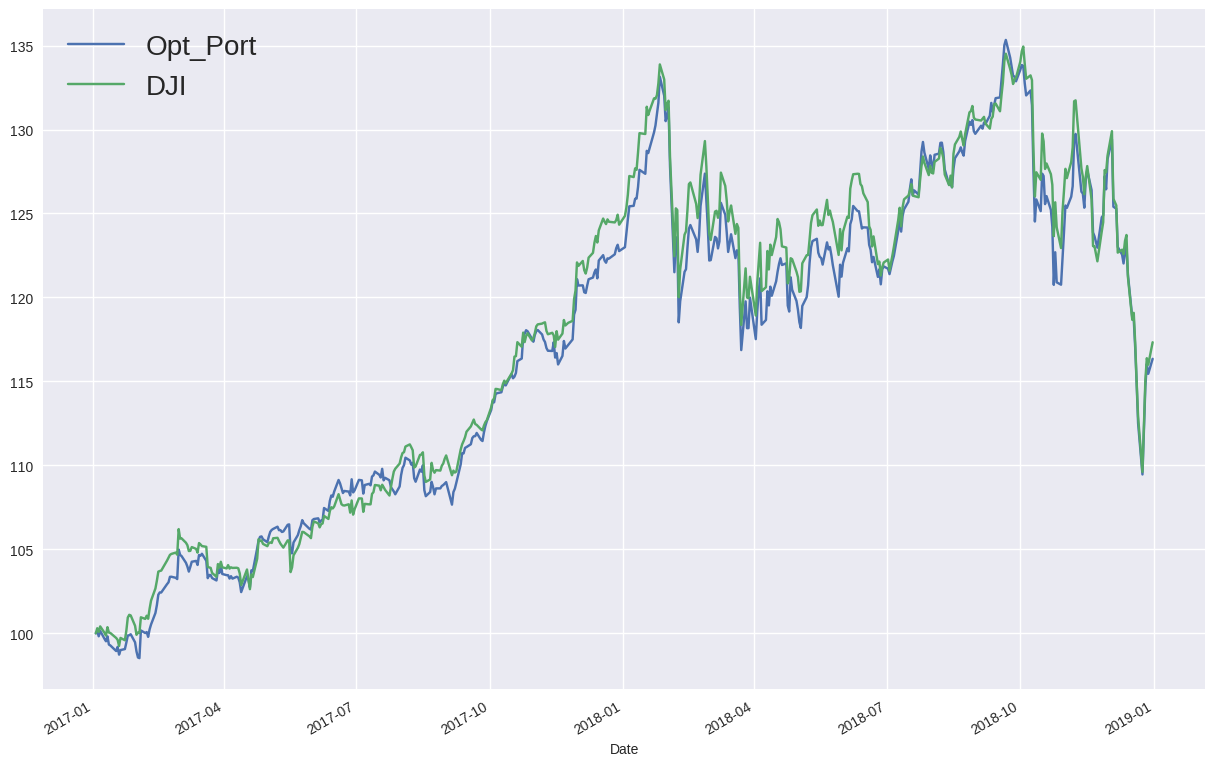

In [103]:
norm_track[["Opt_Port", "DJI"]].plot(figsize = (15, 10))
plt.legend(fontsize = 20, loc = 2)
plt.show()

In [104]:
summary_ann(norm_track[["Opt_Port", "EW_Port", "DJI"]].pct_change())

Return      Risk
Opt_Port  0.084879  0.131867
EW_Port   0.078256  0.127138
DJI       0.089562  0.135206

## Forward Testing (Part 1)

In [105]:
df

AAPL        AXP          BA         CAT       CSCO  \
Date                                                                   
2007-01-03   11.971429  60.360001   89.169998   61.160000  27.730000   
2007-01-04   12.237143  59.919998   89.529999   61.000000  28.459999   
2007-01-05   12.150000  59.130001   89.150002   60.220001  28.469999   
2007-01-08   12.210000  59.689999   88.940002   60.290001  28.629999   
2007-01-09   13.224286  59.310001   88.000000   60.619999  28.469999   
...                ...        ...         ...         ...        ...   
2020-03-24  246.880005  84.050003  127.680000  101.339996  38.599998   
2020-03-25  245.520004  90.169998  158.729996  104.669998  37.669998   
2020-03-26  258.440002  93.290001  180.550003  110.500000  40.580002   
2020-03-27  247.740005  88.730003  162.000000  105.440002  38.820000   
2020-03-30  254.809998  90.269997  152.279999  111.709999  40.320000   

                  CVX         DIS        DOW          GS          HD  ...  \
Date                                                                  ...   
2007-01-03  70.970001   33.738300        NaN  200.720001   41.070000  ...   
2007-01-04  70.279999   34.004654        NaN  198.850006   40.570000  ...   
2007-01-05  70.550003   33.728436        NaN  199.050003   39.790001  ...   
2007-01-08  71.449997   34.034248        NaN  203.729996   39.490002  ...   
2007-01-09  70.629997   33.984924        NaN  204.080002   39.320000  ...   
...               ...         ...        ...         ...         ...  ...   
2020-03-24  66.550003   98.120003  28.469999  153.600006  184.720001  ...   
2020-03-25  69.269997  100.730003  30.379999  155.130005  181.759995  ...   
2020-03-26  76.379997  105.360001  29.680000  165.789993  195.210007  ...   
2020-03-27  68.779999   96.400002  28.559999  158.339996  190.550003  ...   
2020-03-30  71.949997   99.800003  28.650000  159.619995  196.100006  ...   

                    PG        RTX         TRV         UNH           V  \
Date                                                                    
2007-01-03   64.540001  39.528004   53.549999   52.570000         NaN   
2007-01-04   64.050003  39.565765   53.099998   52.910000         NaN   
2007-01-05   63.500000  39.446194   52.410000   52.549999         NaN   
2007-01-08   63.639999  39.767151   52.020000   53.320000         NaN   
2007-01-09   63.480000  39.314034   51.889999   52.680000         NaN   
...                ...        ...         ...         ...         ...   
2020-03-24  103.269997  54.600376   93.739998  219.800003  154.529999   
2020-03-25  100.919998  60.534927   92.180000  234.490005  161.779999   
2020-03-26  107.379997  65.852737   98.669998  255.389999  168.880005   
2020-03-27  110.169998  61.139080   99.949997  242.449997  161.559998   
2020-03-30  115.000000  61.982380  102.589996  251.279999  165.570007   

                   VZ        WBA         WMT        XOM           DJI  
Date                                                                   
2007-01-03  35.306732  46.070000   47.549999  74.110001  12474.519531  
2007-01-04  35.502777  46.160000   47.779999  72.720001  12480.690430  
2007-01-05  34.895969  45.500000   47.389999  73.239998  12398.009766  
2007-01-08  34.363850  45.689999   47.000000  72.650002  12423.490234  
2007-01-09  34.503880  45.930000   47.389999  72.089996  12416.599609  
...               ...        ...         ...        ...           ...  
2020-03-24  49.990002  45.250000  115.029999  35.439999  20704.910156  
2020-03-25  49.939999  41.439999  109.400002  37.290001  21200.550781  
2020-03-26  53.540001  45.669998  109.820000  38.820000  22552.169922  
2020-03-27  52.770000  44.000000  109.580002  36.950001  21636.779297  
2020-03-30  54.770000  45.160000  115.190002  37.500000  22327.480469  

[3334 rows x 31 columns]

In [106]:
ret

AAPL       AXP        BA       CAT      CSCO       CVX  \
Date                                                                     
2007-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2007-01-04  0.022196 -0.007290  0.004037 -0.002616  0.026325 -0.009722   
2007-01-05 -0.007121 -0.013184 -0.004244 -0.012787  0.000351  0.003842   
2007-01-08  0.004938  0.009471 -0.002356  0.001162  0.005620  0.012757   
2007-01-09  0.083070 -0.006366 -0.010569  0.005474 -0.005589 -0.011477   
...              ...       ...       ...       ...       ...       ...   
2020-03-24  0.100325  0.218823  0.208862  0.103321  0.115607  0.227407   
2020-03-25 -0.005509  0.072814  0.243186  0.032860 -0.024093  0.040871   
2020-03-26  0.052623  0.034601  0.137466  0.055699  0.077250  0.102642   
2020-03-27 -0.041402 -0.048880 -0.102742 -0.045792 -0.043371 -0.099502   
2020-03-30  0.028538  0.017356 -0.060000  0.059465  0.038640  0.046089   

                 DIS       DOW        GS        HD  ...        PG       RTX  \
Date                                                ...                       
2007-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2007-01-04  0.007895       NaN -0.009316 -0.012174  ... -0.007592  0.000955   
2007-01-05 -0.008123       NaN  0.001006 -0.019226  ... -0.008587 -0.003022   
2007-01-08  0.009067       NaN  0.023512 -0.007540  ...  0.002205  0.008137   
2007-01-09 -0.001449       NaN  0.001718 -0.004305  ... -0.002514 -0.011394   
...              ...       ...       ...       ...  ...       ...       ...   
2020-03-24  0.144123  0.071106  0.138031  0.137508  ...  0.057011  0.157572   
2020-03-25  0.026600  0.067088  0.009961 -0.016024  ... -0.022756  0.108691   
2020-03-26  0.045964 -0.023041  0.068716  0.073999  ...  0.064011  0.087847   
2020-03-27 -0.085042 -0.037736 -0.044936 -0.023872  ...  0.025983 -0.071579   
2020-03-30  0.035270  0.003151  0.008084  0.029126  ...  0.043841  0.013793   

                 TRV       UNH         V        VZ       WBA       WMT  \
Date                                                                     
2007-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2007-01-04 -0.008403  0.006468       NaN  0.005553  0.001954  0.004837   
2007-01-05 -0.012994 -0.006804       NaN -0.017092 -0.014298 -0.008162   
2007-01-08 -0.007441  0.014653       NaN -0.015249  0.004176 -0.008230   
2007-01-09 -0.002499 -0.012003       NaN  0.004075  0.005253  0.008298   
...              ...       ...       ...       ...       ...       ...   
2020-03-24  0.060887  0.127989  0.138426 -0.006361  0.037606  0.006563   
2020-03-25 -0.016642  0.066833  0.046916 -0.001000 -0.084199 -0.048944   
2020-03-26  0.070406  0.089130  0.043887  0.072087  0.102075  0.003839   
2020-03-27  0.012973 -0.050668 -0.043344 -0.014382 -0.036567 -0.002185   
2020-03-30  0.026413  0.036420  0.024821  0.037900  0.026364  0.051195   

                 XOM       DJI  
Date                            
2007-01-03       NaN       NaN  
2007-01-04 -0.018756  0.000495  
2007-01-05  0.007151 -0.006625  
2007-01-08 -0.008056  0.002055  
2007-01-09 -0.007708 -0.000555  
...              ...       ...  
2020-03-24  0.126868  0.113650  
2020-03-25  0.052201  0.023938  
2020-03-26  0.041030  0.063754  
2020-03-27 -0.048171 -0.040590  
2020-03-30  0.014885  0.031923  

[3334 rows x 31 columns]

In [107]:
tracking_stocks

Index(['MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM', 'TRV'], dtype='object')

In [108]:
def tracking_error_gen(data, tracking_stocks, weights, index, start, end):
    return data.loc[start:end, tracking_stocks].dot(weights).sub(ret.loc[start:end, index]).std() * np.sqrt(252)   

In [109]:
def visual(data, tracking_stocks, weights, index, start, end):
    track = data.loc[start:end, tracking_stocks].dot(weights).add(1).cumprod().mul(100)
    track.name = "Portfolio"
    index = data.loc[start:end, index].add(1).cumprod().mul(100)
    plt.figure(figsize = (12,8))
    track.plot()
    index.plot()
    plt.legend(fontsize = 20, loc = 2)
    plt.show()

In [110]:
tracking_error_gen(ret, tracking_stocks, optimal_weights, "DJI", "2017-01-01", "2018-12-31")

0.03796156173948106

In [111]:
forward_te = tracking_error_gen(ret, tracking_stocks, optimal_weights, "DJI", 
                                "2019-01-01", "2019-12-31")
forward_te

0.047843032410449626

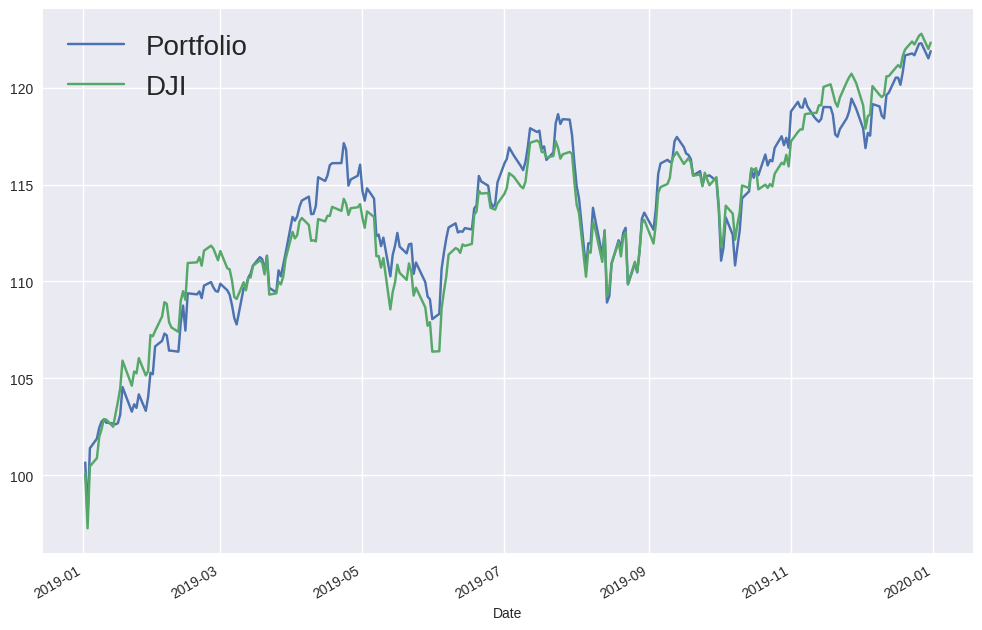

In [112]:
visual(ret, tracking_stocks, optimal_weights, "DJI", "2019-01-01", "2019-12-31")

## Forward Testing (Part 2)

In [115]:
bucket = df.columns.drop(["DOW", "DJI"])
bucket

Index(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM',
       'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE',
       'PG', 'RTX', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT', 'XOM'],
      dtype='object')

In [116]:
np.random.choice(bucket, size = noa, replace = False)

array(['WBA', 'PG', 'KO', 'CAT', 'BA', 'NKE', 'CVX', 'GS', 'WMT', 'UNH'],
      dtype=object)

In [117]:
random_numbers = np.random.random(noa)
random_weights = random_numbers / random_numbers.sum()
random_weights.sum()

1.0

In [118]:
np.random.seed(123)
random_stocks = np.random.choice(bucket, size = noa, replace = False)
random_numbers = np.random.random(noa)
random_weights = random_numbers / random_numbers.sum()

In [119]:
print(random_stocks, random_weights)

['GS' 'XOM' 'CVX' 'VZ' 'HD' 'WBA' 'JPM' 'RTX' 'JNJ' 'TRV'] [0.0858475  0.05974735 0.098733   0.14853474 0.07177554 0.08370995
 0.13136476 0.07500036 0.04705319 0.19823361]


In [120]:
tracking_error_gen(ret, random_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31")

0.055536608820316934

In [121]:
forward_te

0.047843032410449626

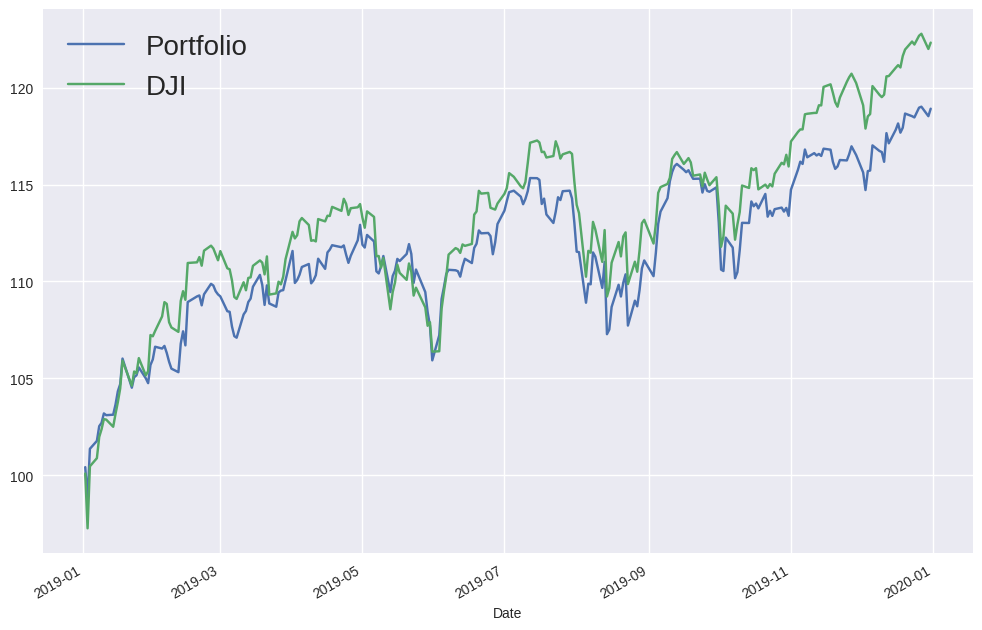

In [122]:
visual(ret, random_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31")

In [123]:
tes = np.empty(10000)
np.random.seed(123)
for i in range(10000):
    random_numbers = np.random.random(noa)
    random_weights = random_numbers / random_numbers.sum()
    random_stocks = np.random.choice(bucket, size = noa, replace = False)
       
    tes[i] = tracking_error_gen(ret, random_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31")

In [124]:
(tes < forward_te).mean()

0.0655

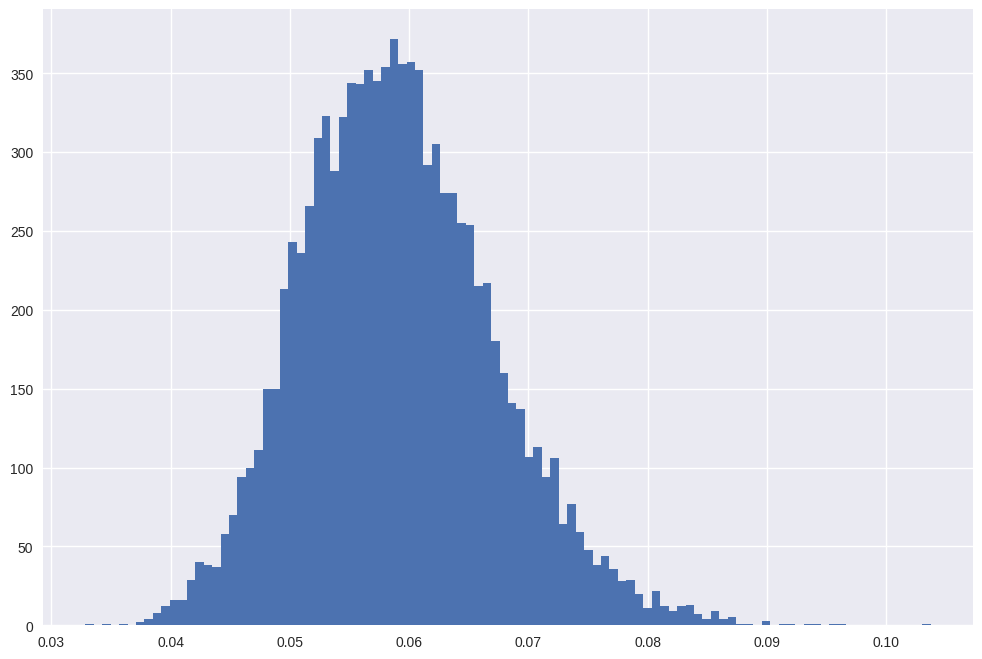

In [125]:
plt.figure(figsize = (12, 8))
plt.hist(tes, bins = 100)
plt.show()